# TP N° 3 : Analyse descriptive exploratoire (AED)

# 2. Analyse de forme: description des variables

1. Télécharger le fichier covid-19.xlsx à partir de l’espace moodle chapitre 3 et charger les
données dans un dataframe data de Pandas.
2. Faire une vue d’ensemble des données, par exemple afficher les 5 premières observations.

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_row', 111)
pd.set_option('display.max_columns', 111)
data = pd.read_excel('data/covid-19.xlsx')

df_covid = data.copy()

df_covid.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW)  Serum Glucose  \
0                                      NaN            NaN   
1                                -0.625073      -0.140648   
2                                      NaN            NaN   
3                                      NaN            NaN   
4                                      NaN            NaN   

  Respiratory Syncytial Virus   Influenza A   Influenza B Parainfluenza 1  \
0                         NaN           NaN           NaN             NaN   
1                not_detected  not_detected  not_detected    not_detected   
2                         NaN           NaN           NaN             NaN   
3                         NaN           NaN           NaN             NaN   
4                not_detected  not_detected  not_detected    not_detected   

  CoronavirusNL63 Rhinovirus/Enterovirus  Mycoplasma pneumoniae  \
0             NaN                    

3. Afficher les noms de toutes les variables et les classer en variables explicatives et variablecible (target). On remarque que la variable, numéro de patient, Patient ID ne sert à rien.
On peut donc la supprimer avec la méthode drop de Pandas.

In [170]:
print(df_covid.columns)

target = df_covid['SARS-Cov-2 exam result']
df_covid = df_covid.drop('SARS-Cov-2 exam result', axis=1)

df_covid = df_covid.drop('Patient ID', axis=1)


Index(['Patient ID', 'Patient age quantile', 'SARS-Cov-2 exam result',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)', 'Hematocrit',
       'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       ...
       'Hb saturation (arterial blood gases)',
       'pCO2 (arterial blood gas analysis)',
       'Base excess (arterial blood gas analysis)',
       'pH (arterial blood gas analysis)',
       'Total CO2 (arterial blood gas analysis)',
       'HCO3 (arterial blood gas analysis)',
       'pO2 (arterial blood gas analysis)', 'Arteiral Fio2', 'Phosphor',
       'ctO2 (arterial blood gas analysis)'],
      dtype='object', length=111)


4. Créer un nouveau dataframe, df_covid, une copie de data.

In [171]:
df_covid = data.copy()

5. Identifier les types de variables, utiliser df_covid.dtypes. Interpréter,(existence de variables qualitatives, quantitatives, . . . ).

In [172]:
df_covid.dtypes

Patient ID                                                object
Patient age quantile                                       int64
SARS-Cov-2 exam result                                    object
Patient addmited to regular ward (1=yes, 0=no)             int64
Patient addmited to semi-intensive unit (1=yes, 0=no)      int64
Patient addmited to intensive care unit (1=yes, 0=no)      int64
Hematocrit                                               float64
Hemoglobin                                               float64
Platelets                                                float64
Mean platelet volume                                     float64
Red blood Cells                                          float64
Lymphocytes                                              float64
Mean corpuscular hemoglobin concentration (MCHC)         float64
Leukocytes                                               float64
Basophils                                                float64
Mean corpuscular hemoglob

6. Calculer le nombre de chaque type de variables, utiliser df_covid.dtypes.values_counts(). Visualiser dans un graphique en camembert les pourcentages des types de variables (utiliser la méthode df_covid.dtypes.values_counts().plot.pie(). On remarque que dans ce graphique qu’on affiche les types des variables: type float pour les variables quantitatives (continues), object (qualitatives).

In [173]:
df_covid.dtypes.value_counts()

float64    70
object     37
int64       4
dtype: int64

<AxesSubplot: >

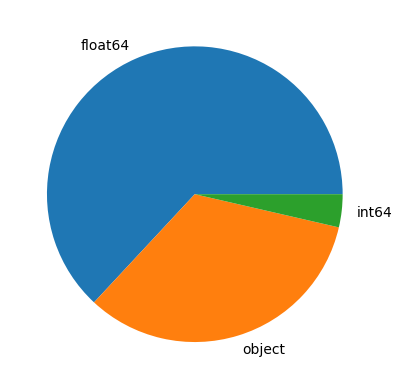

In [174]:
df_covid.dtypes.value_counts().plot.pie()

7. Visualisation des valeurs manquantes

7.a On rappelle que la méthode isna() du Pandas sert à vérifier si un dataframe contient
une valeur NaN. Exécuter: df_covid.isna()[:5]. On remarque que çà retourne un
dataframe booléen (True, False).

In [175]:
df_covid.isna()[:5]

Patient ID  Patient age quantile  SARS-Cov-2 exam result  \
0       False                 False                   False   
1       False                 False                   False   
2       False                 False                   False   
3       False                 False                   False   
4       False                 False                   False   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                           False   
1                                           False   
2                                           False   
3                                           False   
4                                           False   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                              False       
1                                              False       
2                                              False       
3                                              False       
4                                              False       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                              False            True   
1                                              False           False   
2                                              False            True   
3                                              False            True   
4                                              False            True   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0        True       True                   True             True         True   
1       False      False                  False            False        False   
2        True       True                   True             True         True   
3        True       True                   True             True         True   
4        True       True                   True             True         True   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                              True        True       True   
1                                             False       False      False   
2                                              True        True       True   
3                                              True        True       True   
4                                              True        True       True   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                               True         True   
1                              False        False   
2                               True         True   
3                               True         True   
4                               True         True   

   Mean corpuscular volume (MCV)  Monocytes  \
0                           True       True   
1                          False      False   
2                           True       True   
3                           True       True   
4                           True       True   

   Red blood cell distribution width (RDW)  Serum Glucose  \
0                                     True           True   
1                                    False          False   
2                                     True           True   
3                                     True           True   
4                                     True           True   

   Respiratory Syncytial Virus  Influenza A  Influenza B  Parainfluenza 1  \
0                         True         True         True             True   
1                        False        False        False            False   
2                         True         True         True             True   
3                         True         True         True             True   
4                        False        False        False            False   

   CoronavirusNL63  Rhinovirus/Enterovirus  Mycoplasma pneumoniae  \
0             True                    True            

7.b Utiliser la méthode heatmap de Seaborn pour afficher l’ensemble des valeurs manquantes de df_covid. Interpréter.
plt.figure(figsize=(26, 12))
sns.heatmap(df_covidid.isna(), cbar=False)
plt.show()

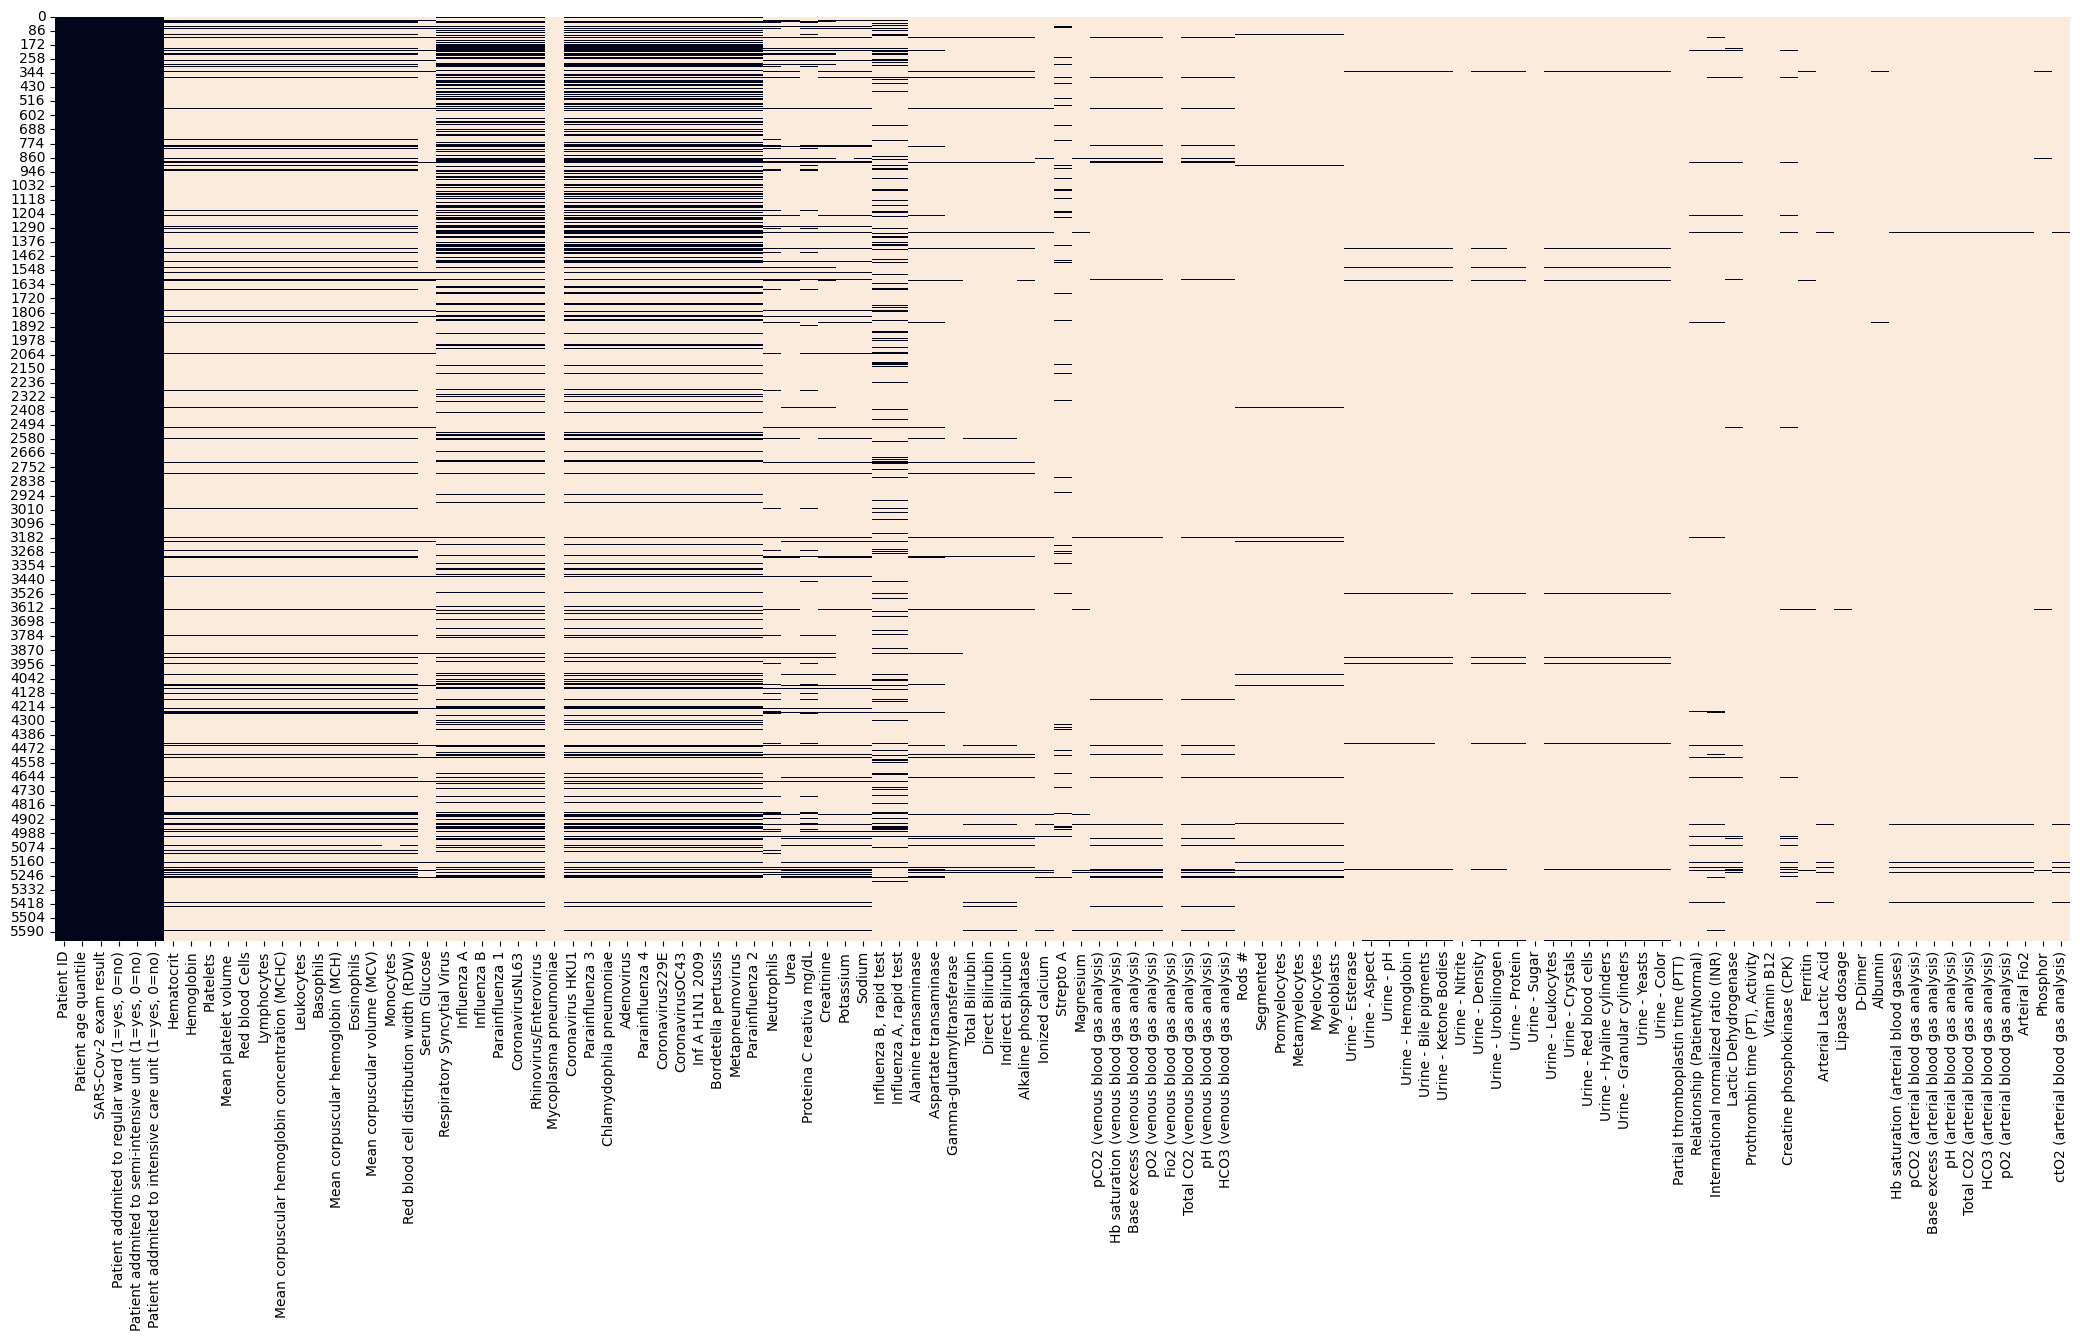

In [176]:
plt.figure(figsize=(26, 12))
sns.heatmap(df_covid.isna(), cbar=False)
plt.show()
plt.close()

On remarque qu'il y a beaucoup de données manquantes, et qu'on a seulement quelques petients pour lesquels on a toute les données. Cela peut impacter notre modèle a determiner la varible cible.
On déduit aussi que certaines varibles sont liées a d'autres, on peut donc dire que plusieurs variables sont groupés et sont les resultantes d'un meme test.

7.c Mesurer le pourcentage des valeurs manquantes de chacune des variables. Exécuter:
(df_covid.isna().sum() / df_covid.shape[0]) * 100. Interpréter.

In [177]:
miss_rates = (df_covid.isna().sum() / df_covid.shape[0]) * 100
miss_rates

Patient ID                                                 0.000000
Patient age quantile                                       0.000000
SARS-Cov-2 exam result                                     0.000000
Patient addmited to regular ward (1=yes, 0=no)             0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)      0.000000
Patient addmited to intensive care unit (1=yes, 0=no)      0.000000
Hematocrit                                                89.316088
Hemoglobin                                                89.316088
Platelets                                                 89.333806
Mean platelet volume                                      89.386960
Red blood Cells                                           89.333806
Lymphocytes                                               89.333806
Mean corpuscular hemoglobin concentration (MCHC)          89.333806
Leukocytes                                                89.333806
Basophils                                       

7.d Trier les pourcentages des valeurs manquantes dans l’ordre croissant:
miss_rates = miss_rates.sort_values(ascending=True)

In [178]:
miss_rates = miss_rates.sort_values(ascending=True)
miss_rates

Patient ID                                                 0.000000
Patient age quantile                                       0.000000
SARS-Cov-2 exam result                                     0.000000
Patient addmited to regular ward (1=yes, 0=no)             0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)      0.000000
Patient addmited to intensive care unit (1=yes, 0=no)      0.000000
Influenza B                                               76.009922
Respiratory Syncytial Virus                               76.009922
Influenza A                                               76.009922
Rhinovirus/Enterovirus                                    76.045358
Inf A H1N1 2009                                           76.045358
CoronavirusOC43                                           76.045358
Coronavirus229E                                           76.045358
Parainfluenza 4                                           76.045358
Adenovirus                                      

8. Dans la suite de notre étude exploratoire, nous allons supprimer les variables ayant un pourcentage de valeurs manquantes qui dépasse 90%. Utiliser une indexation booléenne pour supprimer ces variables. Exécuter:
   
df_covid.columns[miss_rates < 90]
df_covid = df_covid.columns[miss_rates < 90] # Réécriture de df_covid

In [179]:
df_covid.columns[miss_rates < 90]
df_covid = df_covid.columns[miss_rates < 90] # Réécriture de df_covid
df_covid = data[df_covid]
df_covid

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0     44477f75e8169d2                    13               negative   
1     126e9dd13932f68                    17               negative   
2     a46b4402a0e5696                     8               negative   
3     f7d619a94f97c45                     5               negative   
4     d9e41465789c2b5                    15               negative   
...               ...                   ...                    ...   
5639  ae66feb9e4dc3a0                     3               positive   
5640  517c2834024f3ea                    17               negative   
5641  5c57d6037fe266d                     4               negative   
5642  c20c44766f28291                    10               negative   
5643  2697fdccbfeb7f7                    19               positive   

      Patient addmited to regular ward (1=yes, 0=no)  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   
...                                              ...   
5639                                               0   
5640                                               0   
5641                                               0   
5642                                               0   
5643                                               0   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                     0       
1                                                     0       
2                                                     0       
3                                                     0       
4                                                     0       
...                                                 ...       
5639                                                  0       
5640                                                  0       
5641                                                  0       
5642                                                  0       
5643                                                  0       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                     0             NaN   
1                                                     0        0.236515   
2                                                     0             NaN   
3                                                     0             NaN   
4                                                     0             NaN   
...                                                 ...             ...   
5639                                                  0             NaN   
5640                                                  0             NaN   
5641                                                  0             NaN   
5642                                                  0             NaN   
5643                                                  0        0.694287   

      Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  \
0            NaN        NaN                    NaN              NaN   
1      -0.022340  -0.517413               0.010677         0.102004   
2            NaN        NaN                    NaN              NaN   
3            NaN        NaN                    NaN              NaN   
4            NaN        NaN                    NaN              NaN   
...          ...        ...                    ...              ...   
5639         NaN        NaN                    NaN              NaN   
5640         NaN        NaN                    NaN              NaN   
5641         NaN        NaN                    NaN              NaN   
5642         NaN        NaN                    NaN              NaN   
5643    0.541564  -0.906829              -0.325903        

Afficher de nouveau la carte heatmap des valeurs manquantes et les pourcentages des
valeurs manquantes triés dans un ordre croissant. Interpréter.

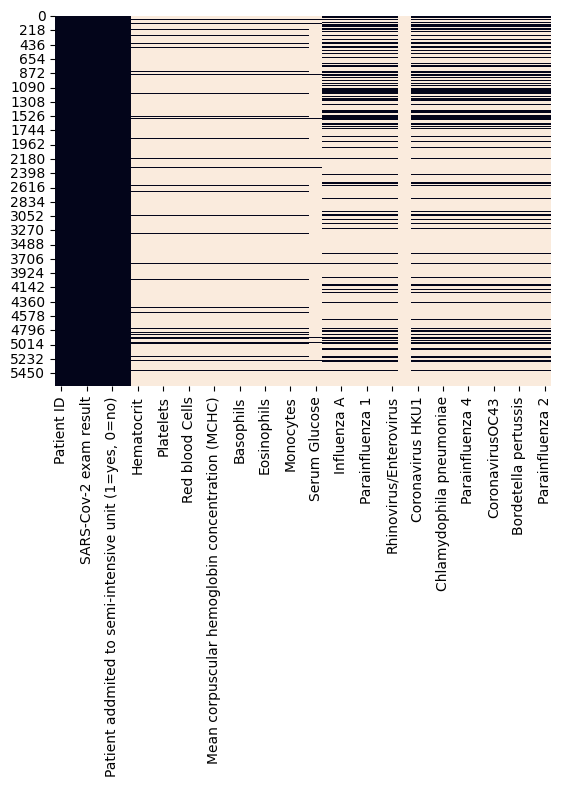

In [180]:
plt.figure()
sns.heatmap(df_covid.isna(), cbar=False)
plt.show()

Nous avons donc nettoyer les données et garder celle qui ont 

# 3. Analyse univariée: signification des variables

## 3.1 Variable cible

1. Afficher variable cible, son type, et ses modalités s’il s’agit d’un type qualitatif.

In [181]:
print("Variable cible: ", target.name)
print("Type de la variable cible: ", target.dtype)
print("Modalités de la variable cible: ", target.unique())

Variable cible:  SARS-Cov-2 exam result
Type de la variable cible:  object
Modalités de la variable cible:  ['negative' 'positive']


2. On rappelle qu’une variable du dataframe df_covid a une structure de Series et donc on peut
utiliser les mêmes méthodes d’un dataframe. Avec la méthode value_counts(), calculer le
nombre de patients testés positifs et négatifs au covid.

In [182]:
print("Nombre de patients testés positifs: ", target.value_counts()[1])
print("Nombre de patients testés négatifs: ", target.value_counts()[0])

Nombre de patients testés positifs:  558
Nombre de patients testés négatifs:  5086


3. Afficher sous forme de pourcentage les cas positifs et négatifs. Utiliser la méthode
value_counts(normalize=True). Interpréter.

In [183]:
target.value_counts(normalize=True)

negative    0.901134
positive    0.098866
Name: SARS-Cov-2 exam result, dtype: float64

90.11% des patients testés sont négatifs et 9.89% sont positifs.

## 3.2 Histogrammes des variables quantitatives

4. Afficher les noms de toutes les variables continues, utiliser la méthode
select_dtypes('float’) de Pandas.

In [184]:
df_covid.select_dtypes('float')

Hematocrit  Hemoglobin  Platelets  Mean platelet volume   \
0            NaN         NaN        NaN                    NaN   
1       0.236515   -0.022340  -0.517413               0.010677   
2            NaN         NaN        NaN                    NaN   
3            NaN         NaN        NaN                    NaN   
4            NaN         NaN        NaN                    NaN   
...          ...         ...        ...                    ...   
5639         NaN         NaN        NaN                    NaN   
5640         NaN         NaN        NaN                    NaN   
5641         NaN         NaN        NaN                    NaN   
5642         NaN         NaN        NaN                    NaN   
5643    0.694287    0.541564  -0.906829              -0.325903   

      Red blood Cells  Lymphocytes  \
0                 NaN          NaN   
1            0.102004     0.318366   
2                 NaN          NaN   
3                 NaN          NaN   
4                 NaN          NaN   
...               ...          ...   
5639              NaN          NaN   
5640              NaN          NaN   
5641              NaN          NaN   
5642              NaN          NaN   
5643         0.578024    -0.295726   

      Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                                  NaN         NaN        NaN   
1                                            -0.950790   -0.094610  -0.223767   
2                                                  NaN         NaN        NaN   
3                                                  NaN         NaN        NaN   
4                                                  NaN         NaN        NaN   
...                                                ...         ...        ...   
5639                                               NaN         NaN        NaN   
5640                                               NaN         NaN        NaN   
5641                                               NaN         NaN        NaN   
5642                                               NaN         NaN        NaN   
5643                                         -0.353319   -1.288428  -1.140144   

      Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                   NaN          NaN   
1                             -0.292269     1.482158   
2                                   NaN          NaN   
3                                   NaN          NaN   
4                                   NaN          NaN   
...                                 ...          ...   
5639                                NaN          NaN   
5640                                NaN          NaN   
5641                                NaN          NaN   
5642                                NaN          NaN   
5643                          -0.135455    -0.835508   

      Mean corpuscular volume (MCV)  Monocytes  \
0                               NaN        NaN   
1                          0.166192   0.357547   
2                               NaN        NaN   
3                               NaN        NaN   
4                               NaN        NaN   
...                             ...        ...   
5639                            NaN        NaN   
5640                            NaN        NaN   
5641                            NaN        NaN   
5642                            NaN        NaN   
5643                       0.025985   0.567652   

      Red blood cell distribution width (RDW)  Serum Glucose  \
0                                         NaN            NaN   
1                                   -0.625073      -0.140648   
2                                         NaN            NaN   
3                                         NaN            NaN   
4                                         NaN            NaN   
...                                       ...            ...   
5639                                      NaN            NaN 

5. Écrire une fonction qui utilise la méthode distplot de Seaborn et retourne les graphiques
des distributions des variables continues.

C:\Users\Mostafa\AppData\Local\Temp\ipykernel_19636\2210412178.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\Mostafa\AppData\Local\Temp\ipykernel_19636\2210412178.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\Mostafa\AppData\Local\Temp\ipykernel_19

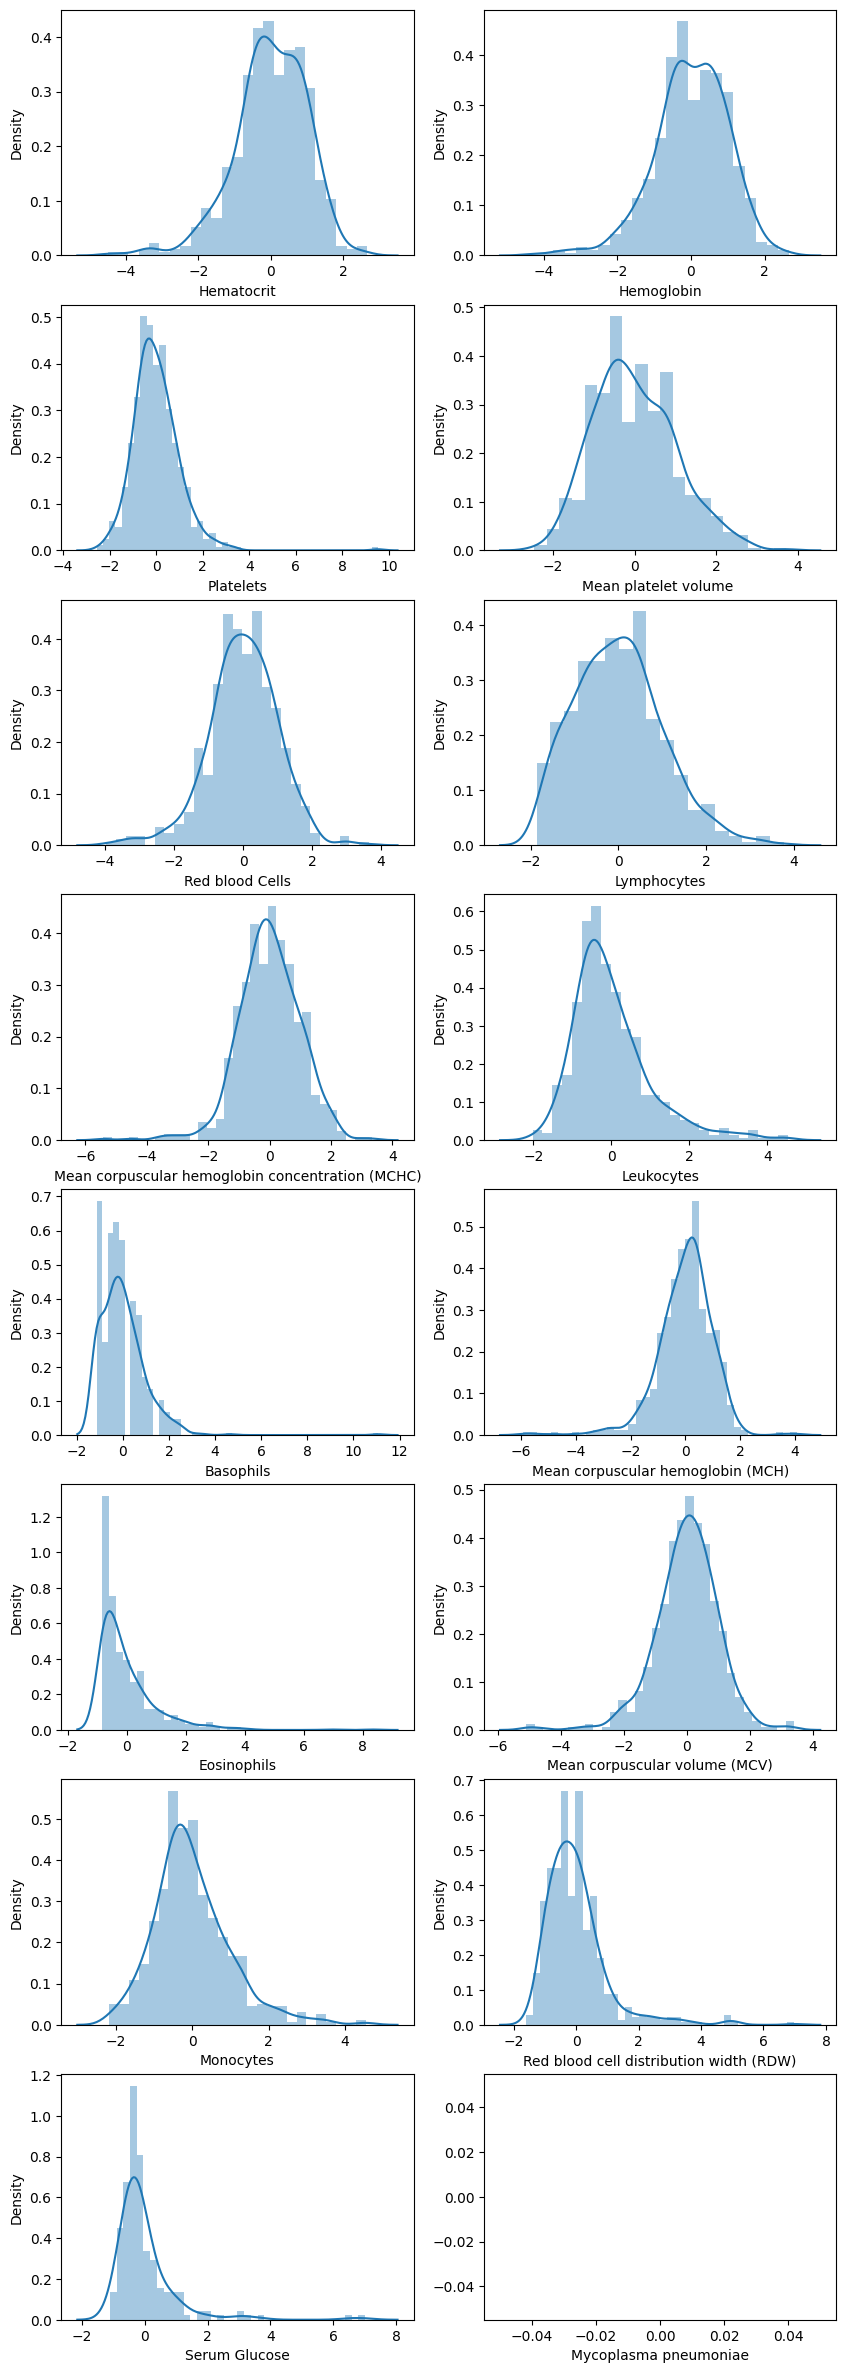

In [185]:
def plot_dist(df, col):
    plt.figure(figsize=(10, 30))
    for i, col in enumerate(df.select_dtypes('float'), 1):
        plt.subplot(8, 2, i)
        sns.distplot(df[col])
    plt.show()
    plt.close()

plot_dist(df_covid, df_covid.select_dtypes('float'))

6. Calculer le coefficient d’assymètrie de deux variables Hemtocrit et Red blood cell
distirbution with (RDW).

In [186]:
print("Coefficient de corrélation entre Hematocrit et Red blood cell distribution width (RDW): \n",
      df_covid["Hematocrit"].corr(df_covid["Red blood cell distribution width (RDW)"]))


Coefficient de corrélation entre Hematocrit et Red blood cell distribution width (RDW): 
 -0.2647075621824379


7. Interpréter le graphique pour la variable Patient age quantile.

C:\Users\Mostafa\AppData\Local\Temp\ipykernel_19636\3335784584.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_covid["Patient age quantile"])


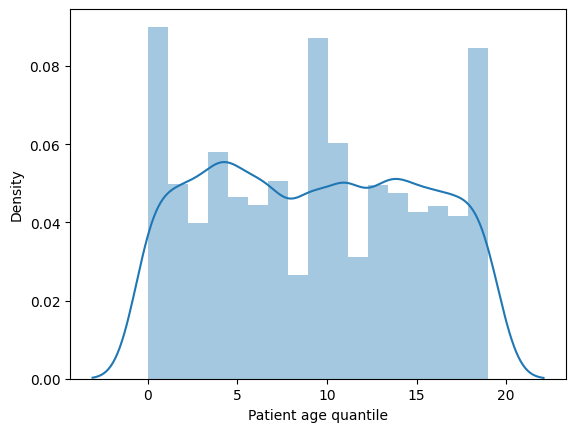

In [187]:
sns.distplot(df_covid["Patient age quantile"])
plt.show()
plt.close()

Il est compliqué d'interpreter ce graphique car il y a eu un traitement au prelable.

## 3.3 Visualisation des variables qualitatives

8. Afficher les différentes modalités (catégories) de chaque variable qualitative. Exécuter le code suivant:
for col in df_covid.select_dtypes('object'):
print(f'{col :-<70} {df_covid[col].unique()}') # créer un système de marge

In [190]:
for col in df_covid.select_dtypes('object'):
    print(f'{col :-<70} {df_covid[col].unique()}')  # créer un système de marge


Patient ID------------------------------------------------------------ ['44477f75e8169d2' '126e9dd13932f68' 'a46b4402a0e5696' ...
 '5c57d6037fe266d' 'c20c44766f28291' '2697fdccbfeb7f7']
SARS-Cov-2 exam result------------------------------------------------ ['negative' 'positive']
Respiratory Syncytial Virus------------------------------------------- [nan 'not_detected' 'detected']
Influenza A----------------------------------------------------------- [nan 'not_detected' 'detected']
Influenza B----------------------------------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 1------------------------------------------------------- [nan 'not_detected' 'detected']
CoronavirusNL63------------------------------------------------------- [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus------------------------------------------------ [nan 'detected' 'not_detected']
Coronavirus HKU1------------------------------------------------------ [nan 'not_detected' 'detected'

9. Visualiser dans des graphiques en camembert les catégories de chacune des variables, (utiliser la méthode df_covid.dtypes.values_counts().plot.pie(). Interpréter.

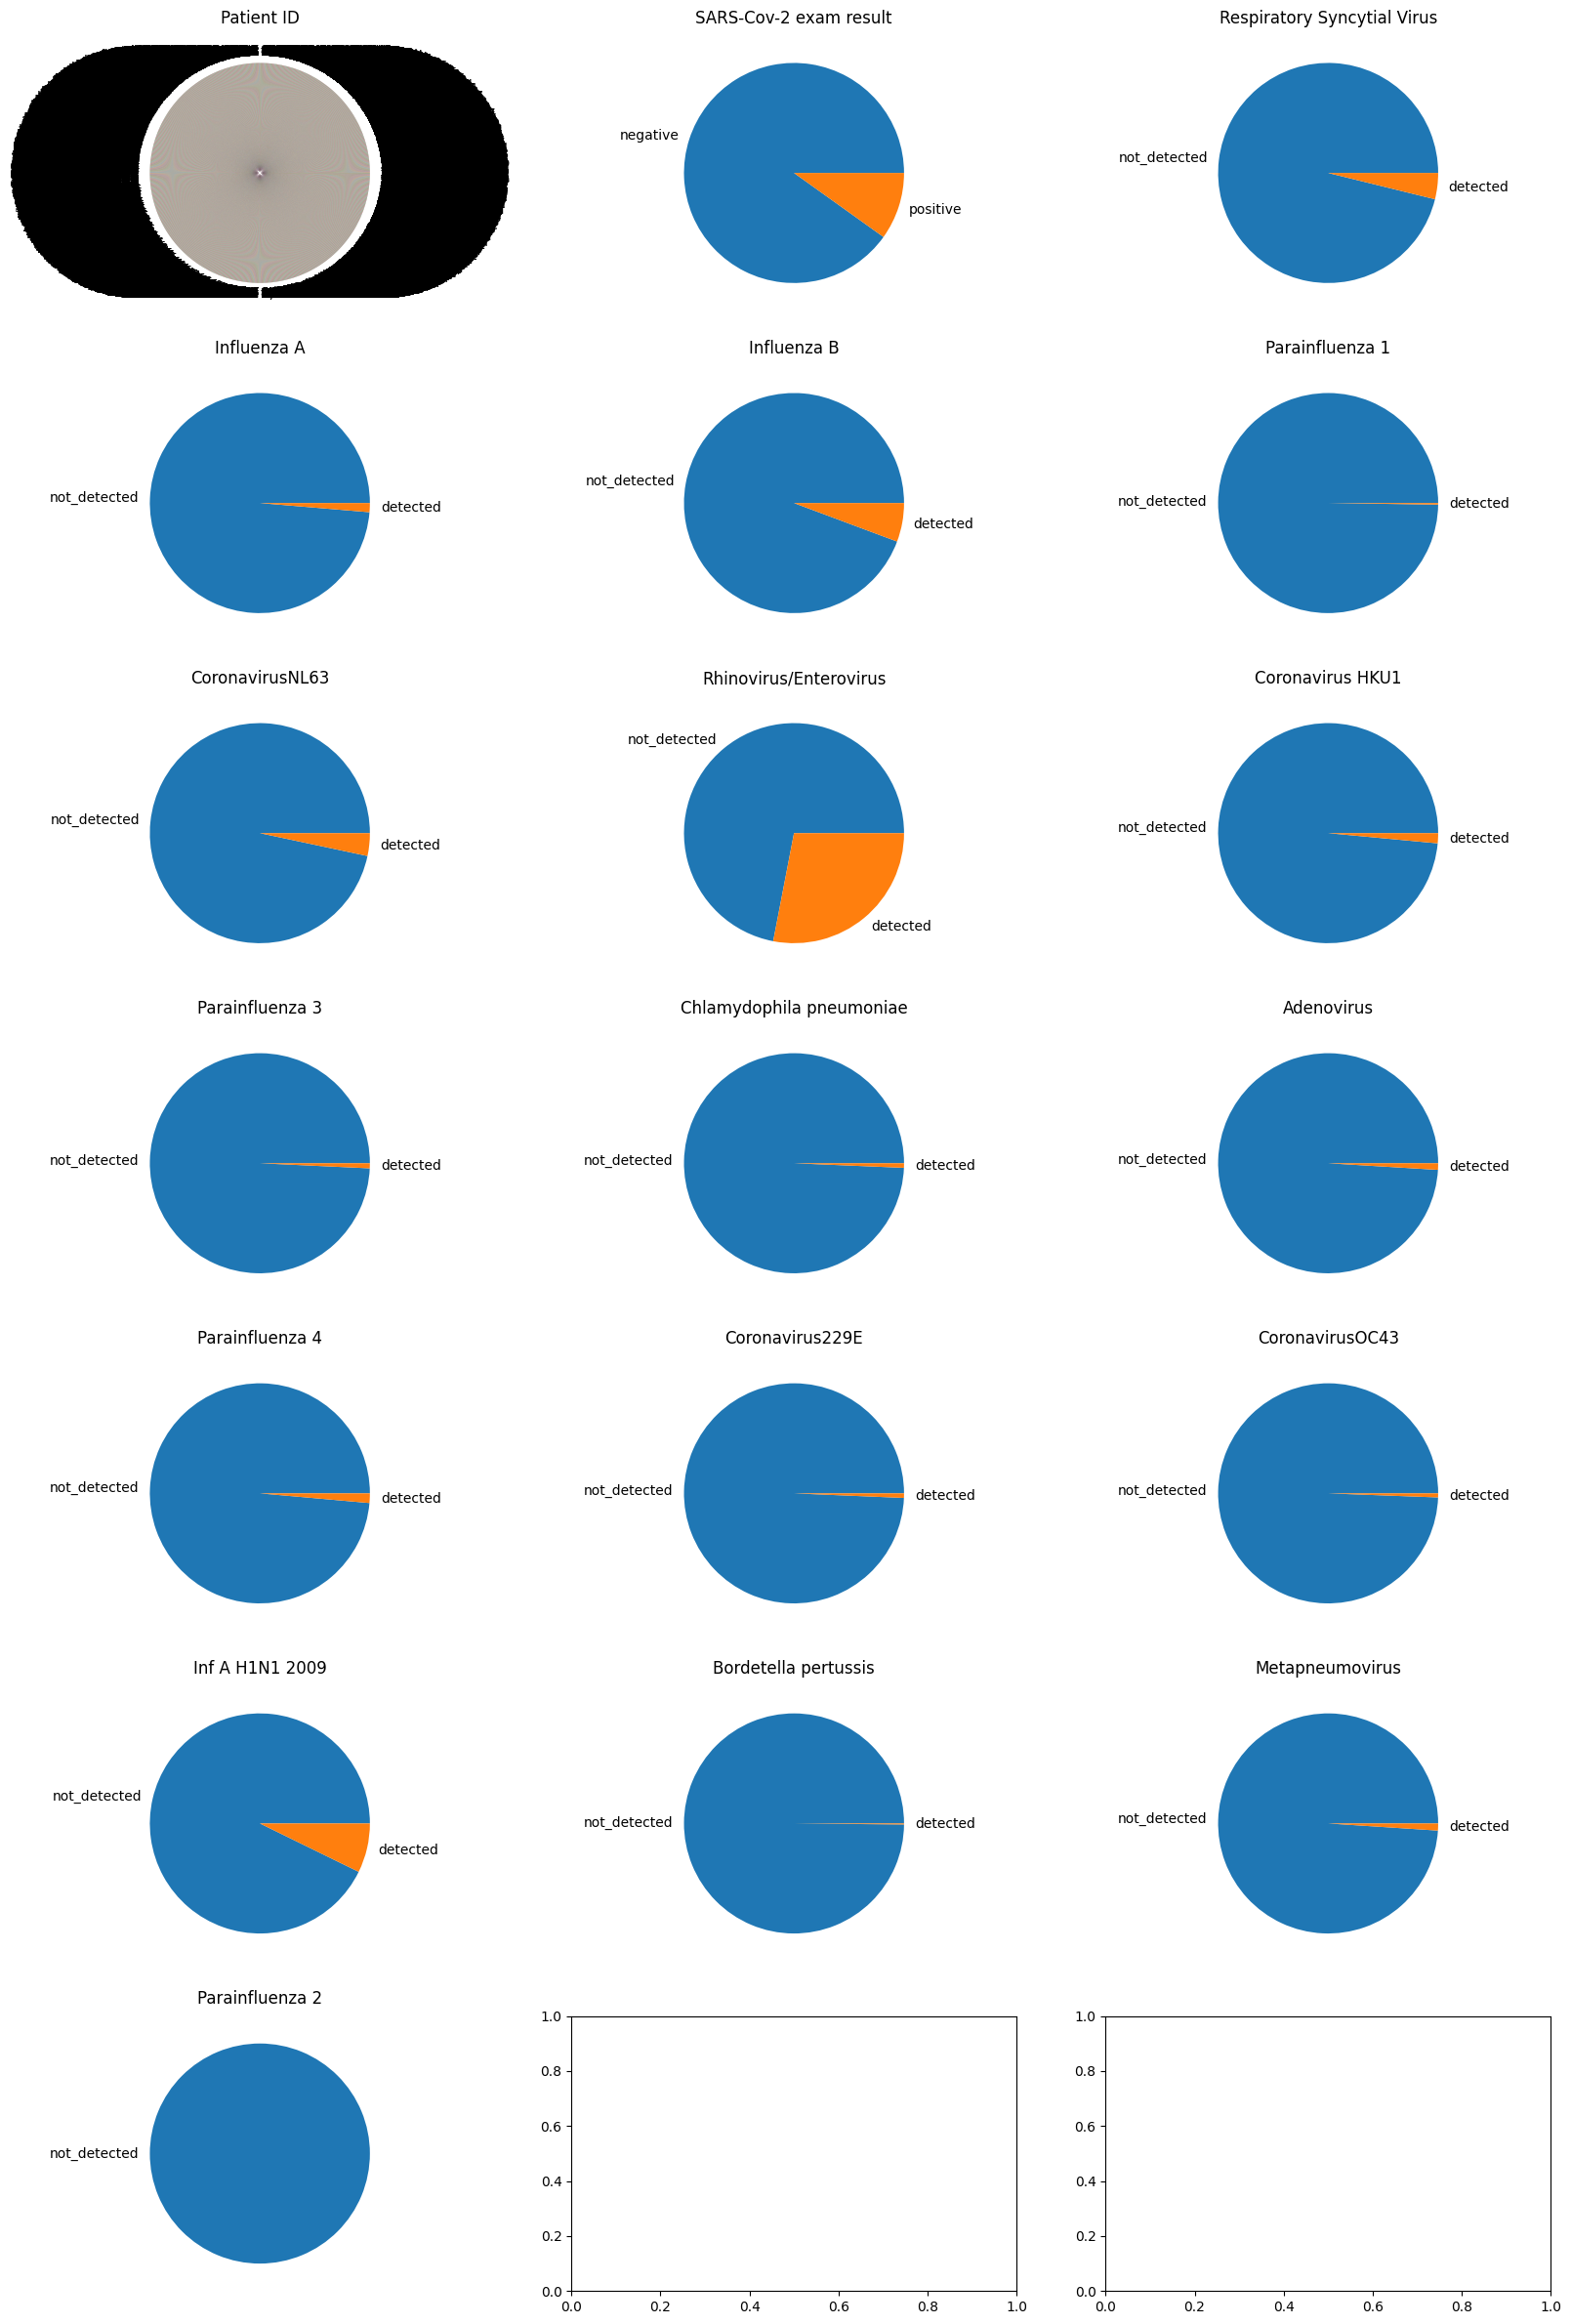

In [191]:
fig, axes = plt.subplots(7, 3, figsize=(20, 30))
for i, col in enumerate(df_covid.select_dtypes('object')):
    df_covid[col].value_counts().plot.pie(ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_ylabel('')
    axes[i // 3, i % 3].set_title(col, rotation=0, ha='center', va='bottom')

plt.show()
plt.close()

Toutes les varibales sont binaires et nous pouvons aussi remarquer que la varibale RhinoVirus est plus elevé que les autres.

# 4 Analyse bivariée: relation entre la variable cible / autres variables

## 4.1 Création des sous-ensembles

1. Créer deux dataframes df_covid_pos et df_covid_neg correspondent aux patients testés positifs et négatifs, respectivement. Afficher les dimensions (shapes) de chaque nouveau dataframe.

In [192]:
df_covid

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0     44477f75e8169d2                    13               negative   
1     126e9dd13932f68                    17               negative   
2     a46b4402a0e5696                     8               negative   
3     f7d619a94f97c45                     5               negative   
4     d9e41465789c2b5                    15               negative   
...               ...                   ...                    ...   
5639  ae66feb9e4dc3a0                     3               positive   
5640  517c2834024f3ea                    17               negative   
5641  5c57d6037fe266d                     4               negative   
5642  c20c44766f28291                    10               negative   
5643  2697fdccbfeb7f7                    19               positive   

      Patient addmited to regular ward (1=yes, 0=no)  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   
...                                              ...   
5639                                               0   
5640                                               0   
5641                                               0   
5642                                               0   
5643                                               0   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                     0       
1                                                     0       
2                                                     0       
3                                                     0       
4                                                     0       
...                                                 ...       
5639                                                  0       
5640                                                  0       
5641                                                  0       
5642                                                  0       
5643                                                  0       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                     0             NaN   
1                                                     0        0.236515   
2                                                     0             NaN   
3                                                     0             NaN   
4                                                     0             NaN   
...                                                 ...             ...   
5639                                                  0             NaN   
5640                                                  0             NaN   
5641                                                  0             NaN   
5642                                                  0             NaN   
5643                                                  0        0.694287   

      Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  \
0            NaN        NaN                    NaN              NaN   
1      -0.022340  -0.517413               0.010677         0.102004   
2            NaN        NaN                    NaN              NaN   
3            NaN        NaN                    NaN              NaN   
4            NaN        NaN                    NaN              NaN   
...          ...        ...                    ...              ...   
5639         NaN        NaN                    NaN              NaN   
5640         NaN        NaN                    NaN              NaN   
5641         NaN        NaN                    NaN              NaN   
5642         NaN        NaN                    NaN              NaN   
5643    0.541564  -0.906829              -0.325903        

In [193]:
df_covid_pos = df_covid[target == 'positive']
df_covid_neg = df_covid[target == 'negative']

print("df_covid_pos shape: ", df_covid_pos.shape)
print("df_covid_neg shape: ", df_covid_neg.shape)

df_covid_pos shape:  (558, 39)
df_covid_neg shape:  (5086, 39)


2. Créer deux groupes de variables: on remarque que les tests cliniques correspondent aux test
viraux et taux sanguins selon le pourcentage des valeurs manquantes. Exécuter:
3
miss_rates = df_covid.isna().sum() / len(df_covid)
bloodtest_features = df_covid.columns[(miss_rates < 0.9) & (miss_rates >0.88)]
viraltest_features = df_covid.columns[(miss_rates < 0.88) & (miss_rates >0.75)]

In [194]:
miss_rates = df_covid.isna().sum() / len(df_covid)
bloodtest_features = df_covid.columns[(miss_rates < 0.9) & (miss_rates >0.88)]
viraltest_features = df_covid.columns[(miss_rates < 0.88) & (miss_rates >0.75)]

3. Afficher ces deux groupes.

In [195]:
print("bloodtest_features: ", bloodtest_features)
print("viraltest_features: ", viraltest_features)

bloodtest_features:  Index(['Hematocrit', 'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       'Red blood Cells', 'Lymphocytes',
       'Mean corpuscular hemoglobin concentration (MCHC)', 'Leukocytes',
       'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils',
       'Mean corpuscular volume (MCV)', 'Monocytes',
       'Red blood cell distribution width (RDW)'],
      dtype='object')
viraltest_features:  Index(['Respiratory Syncytial Virus', 'Influenza A', 'Influenza B',
       'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus',
       'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae',
       'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43',
       'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus',
       'Parainfluenza 2'],
      dtype='object')


## 4.2 Relation: variable cible / variables quantitatives (taux sanguins)

4. Tracer les distributions conditionnelles des variables de groupe taux sanguins sachant la variable cible patients soient testés positifs et négatifs au covid. Utiliser la méthode  distplt de seaborn.

les Nous remarquons que les taux des Platelets, Lymphocytes et Leukocytes chez les individus testés positifs au Corona virus sont différents de ceux des personnes testées négatives. Pour bien valider ces constations, il va falloir les transformer en tests d’hypothèse et étudier leurs robustesses, c’est à dire vérifier la signification de chaque test (voir la section 5 sur la validation des tests).

C:\Users\Mostafa\AppData\Local\Temp\ipykernel_19636\3469337165.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_covid_pos[col], ax=ax, label='positive')
C:\Users\Mostafa\AppData\Local\Temp\ipykernel_19636\3469337165.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_covid_neg[col], ax=

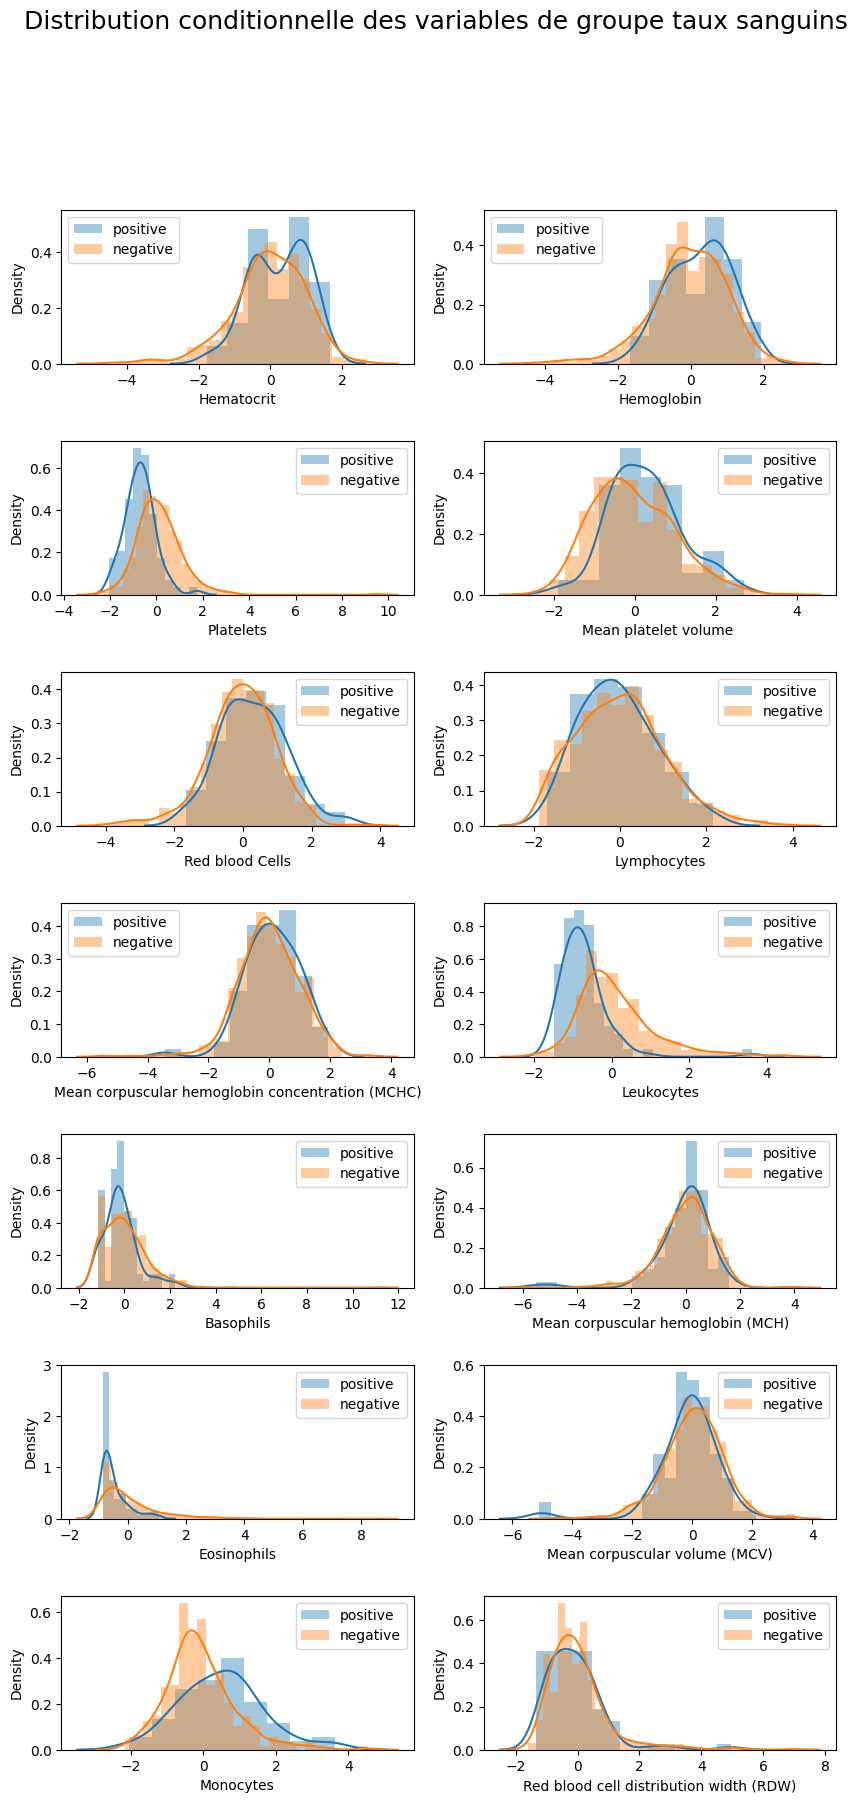

In [196]:
# define subplot grid
fig, axs = plt.subplots(nrows=7, ncols=2, figsize=(10, 20))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Distribution conditionnelle des variables de groupe taux sanguins", fontsize=18)

for col, ax in zip(bloodtest_features, axs.ravel()):
    sns.distplot(df_covid_pos[col], ax=ax, label='positive')
    sns.distplot(df_covid_neg[col], ax=ax, label='negative')
    ax.legend()

plt.show()
plt.close()

Il semblerait que les gens atteint du covid ont un Platelets different. Dememe sur les Monocytes et Leukocytes.

5. Tracer la distribution conditionnelle de la variable age sachant la cible. Interpréter.

C:\Users\Mostafa\AppData\Local\Temp\ipykernel_19636\3335784584.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_covid["Patient age quantile"])


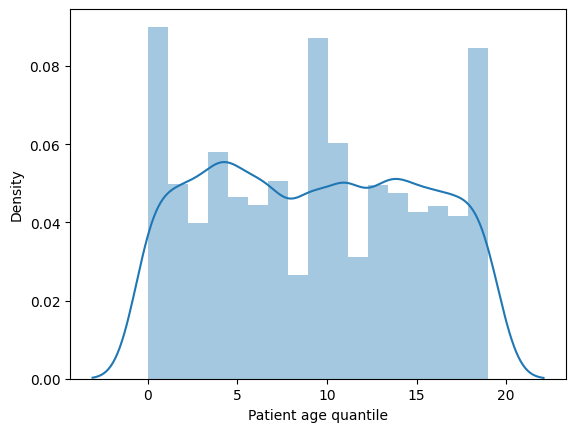

In [198]:
sns.distplot(df_covid["Patient age quantile"])
plt.show()
plt.close()

<AxesSubplot: xlabel='Patient age quantile', ylabel='count'>

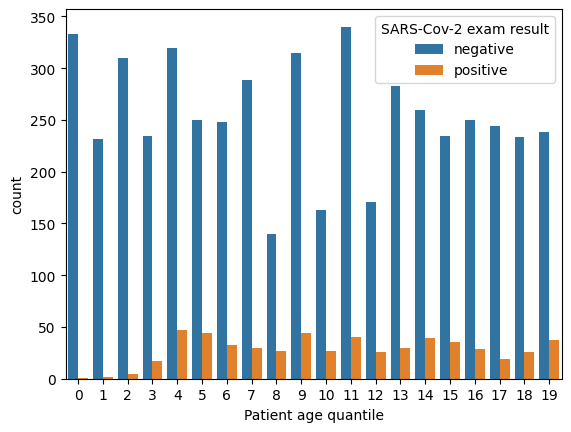

In [199]:
sns.countplot(x="Patient age quantile", hue="SARS-Cov-2 exam result", data=df_covid)

Il semblerait egalement que l'age soit lié au Covid mais ce n'est qu'une supposition qui necessite plus d'approfondissement.

## 4.3 Relation: variable cible / variables quantitatives (tests viraux)

6. Nous constatons que la variable cible et les variables des tests viraux sont de
type catégoriel. Pour tracer la distribution des tests viraux sachant la vari-
able cible on utilise tableaux de contingence (cross tabulation, cross-tab), qui sont des
méthodes de représentation de données issues d’un comptage permettant d’estimer
la dépendance entre deux caractères. Ces tableaux consistent à croiser deux
caractères en dénombrant l’effectif correspondant à leur conjonction. Exécuter
pd.crosstab(df_covid['SARS-Cov-2 exam result'], df_covid['Influenza A']).


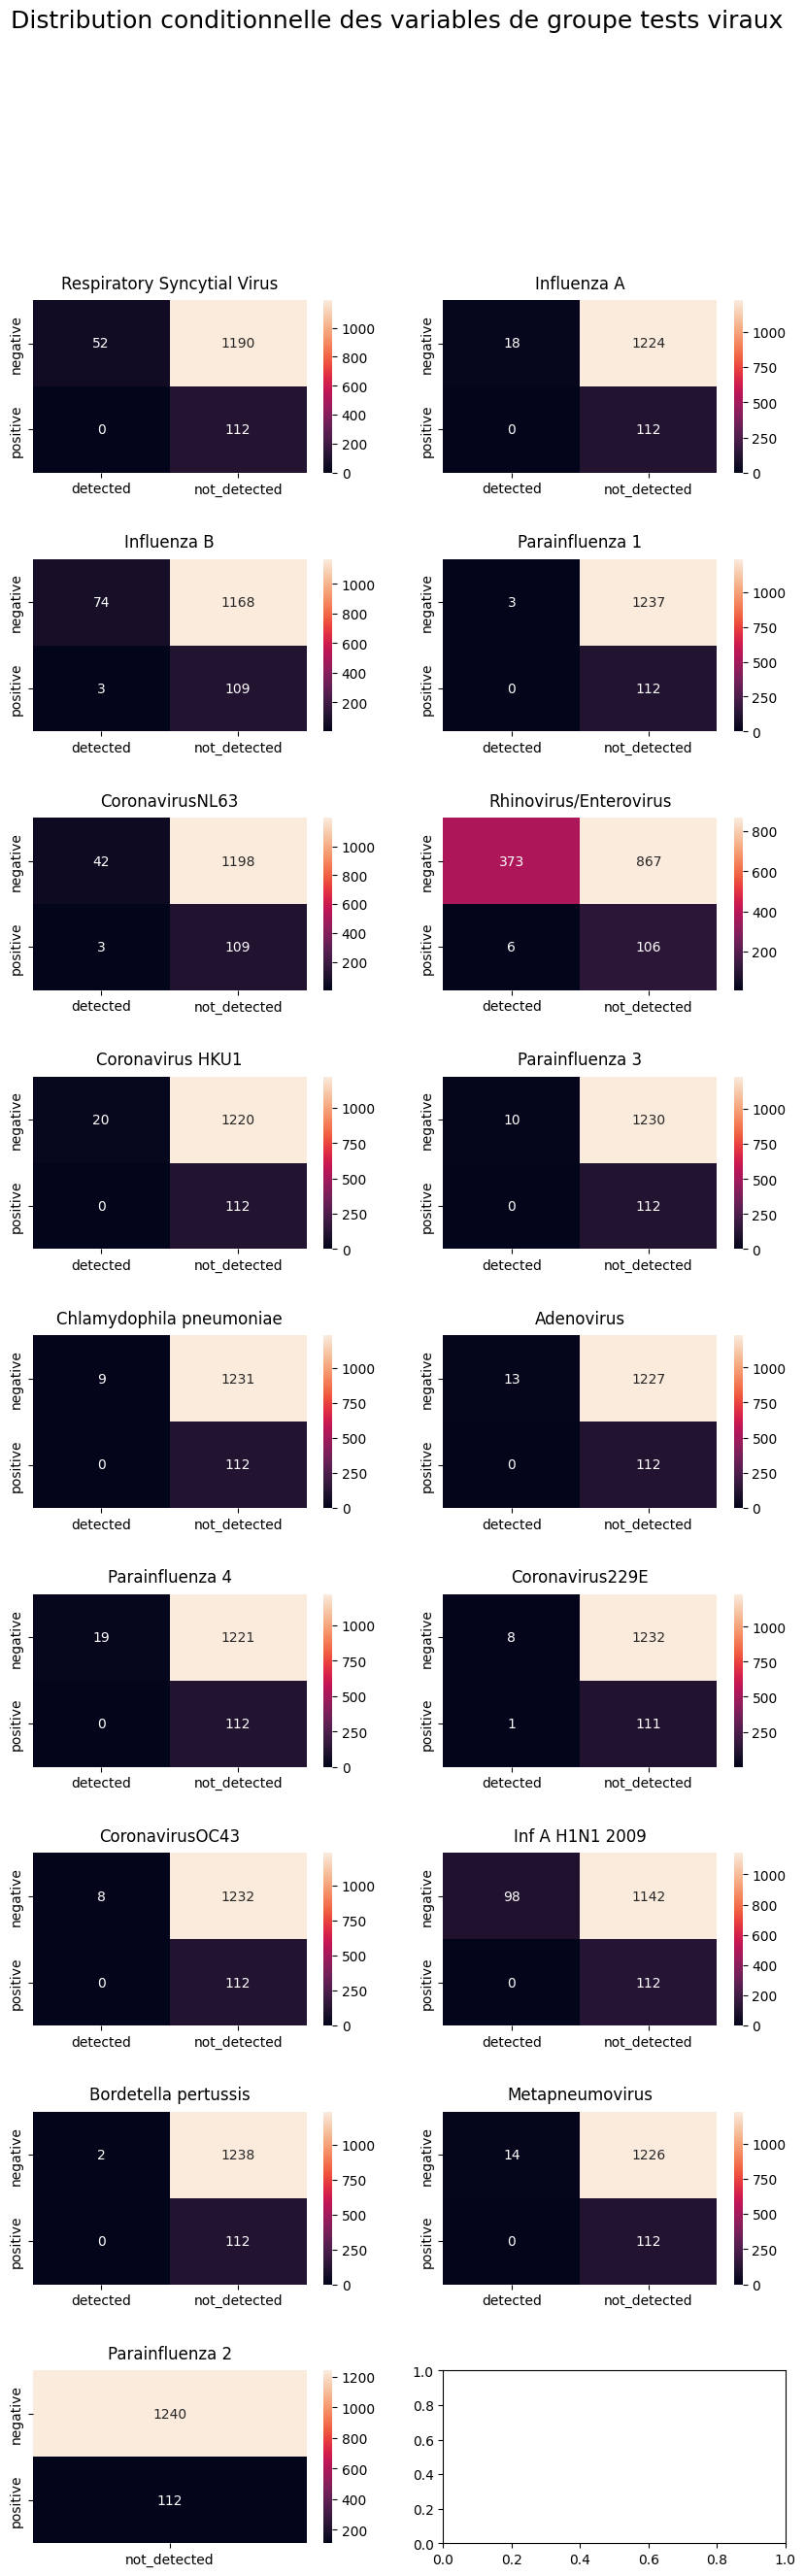

In [207]:
fig, axs = plt.subplots(nrows=9, ncols=2, figsize=(10, 30))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Distribution conditionnelle des variables de groupe tests viraux", fontsize=18)

for col, ax in zip(viraltest_features, axs.ravel()):
    sns.heatmap(pd.crosstab(df_covid['SARS-Cov-2 exam result'], df_covid[col]), annot=True, fmt='d', ax=ax)

    # Mettre le titre en haut, suprimer le titre en bas et supprimer le titre de l'axe y

    ax.set_title(col, rotation=0, ha='center', va='bottom')
    ax.set_ylabel('')
    ax.set_xlabel('')


plt.show()

On remarque qu'il y a un grand nombre de personne positif lié au Rhinovirus. 

# 5. Analyse approfondie

## 5.1 Relation: variables quantitatives / variables quantitatives

1. Utiliser la fonction pairplot de Seaborn pour tracer les graphiques des distributions bivariées par paires de variables taux sanguins. Interpréter.

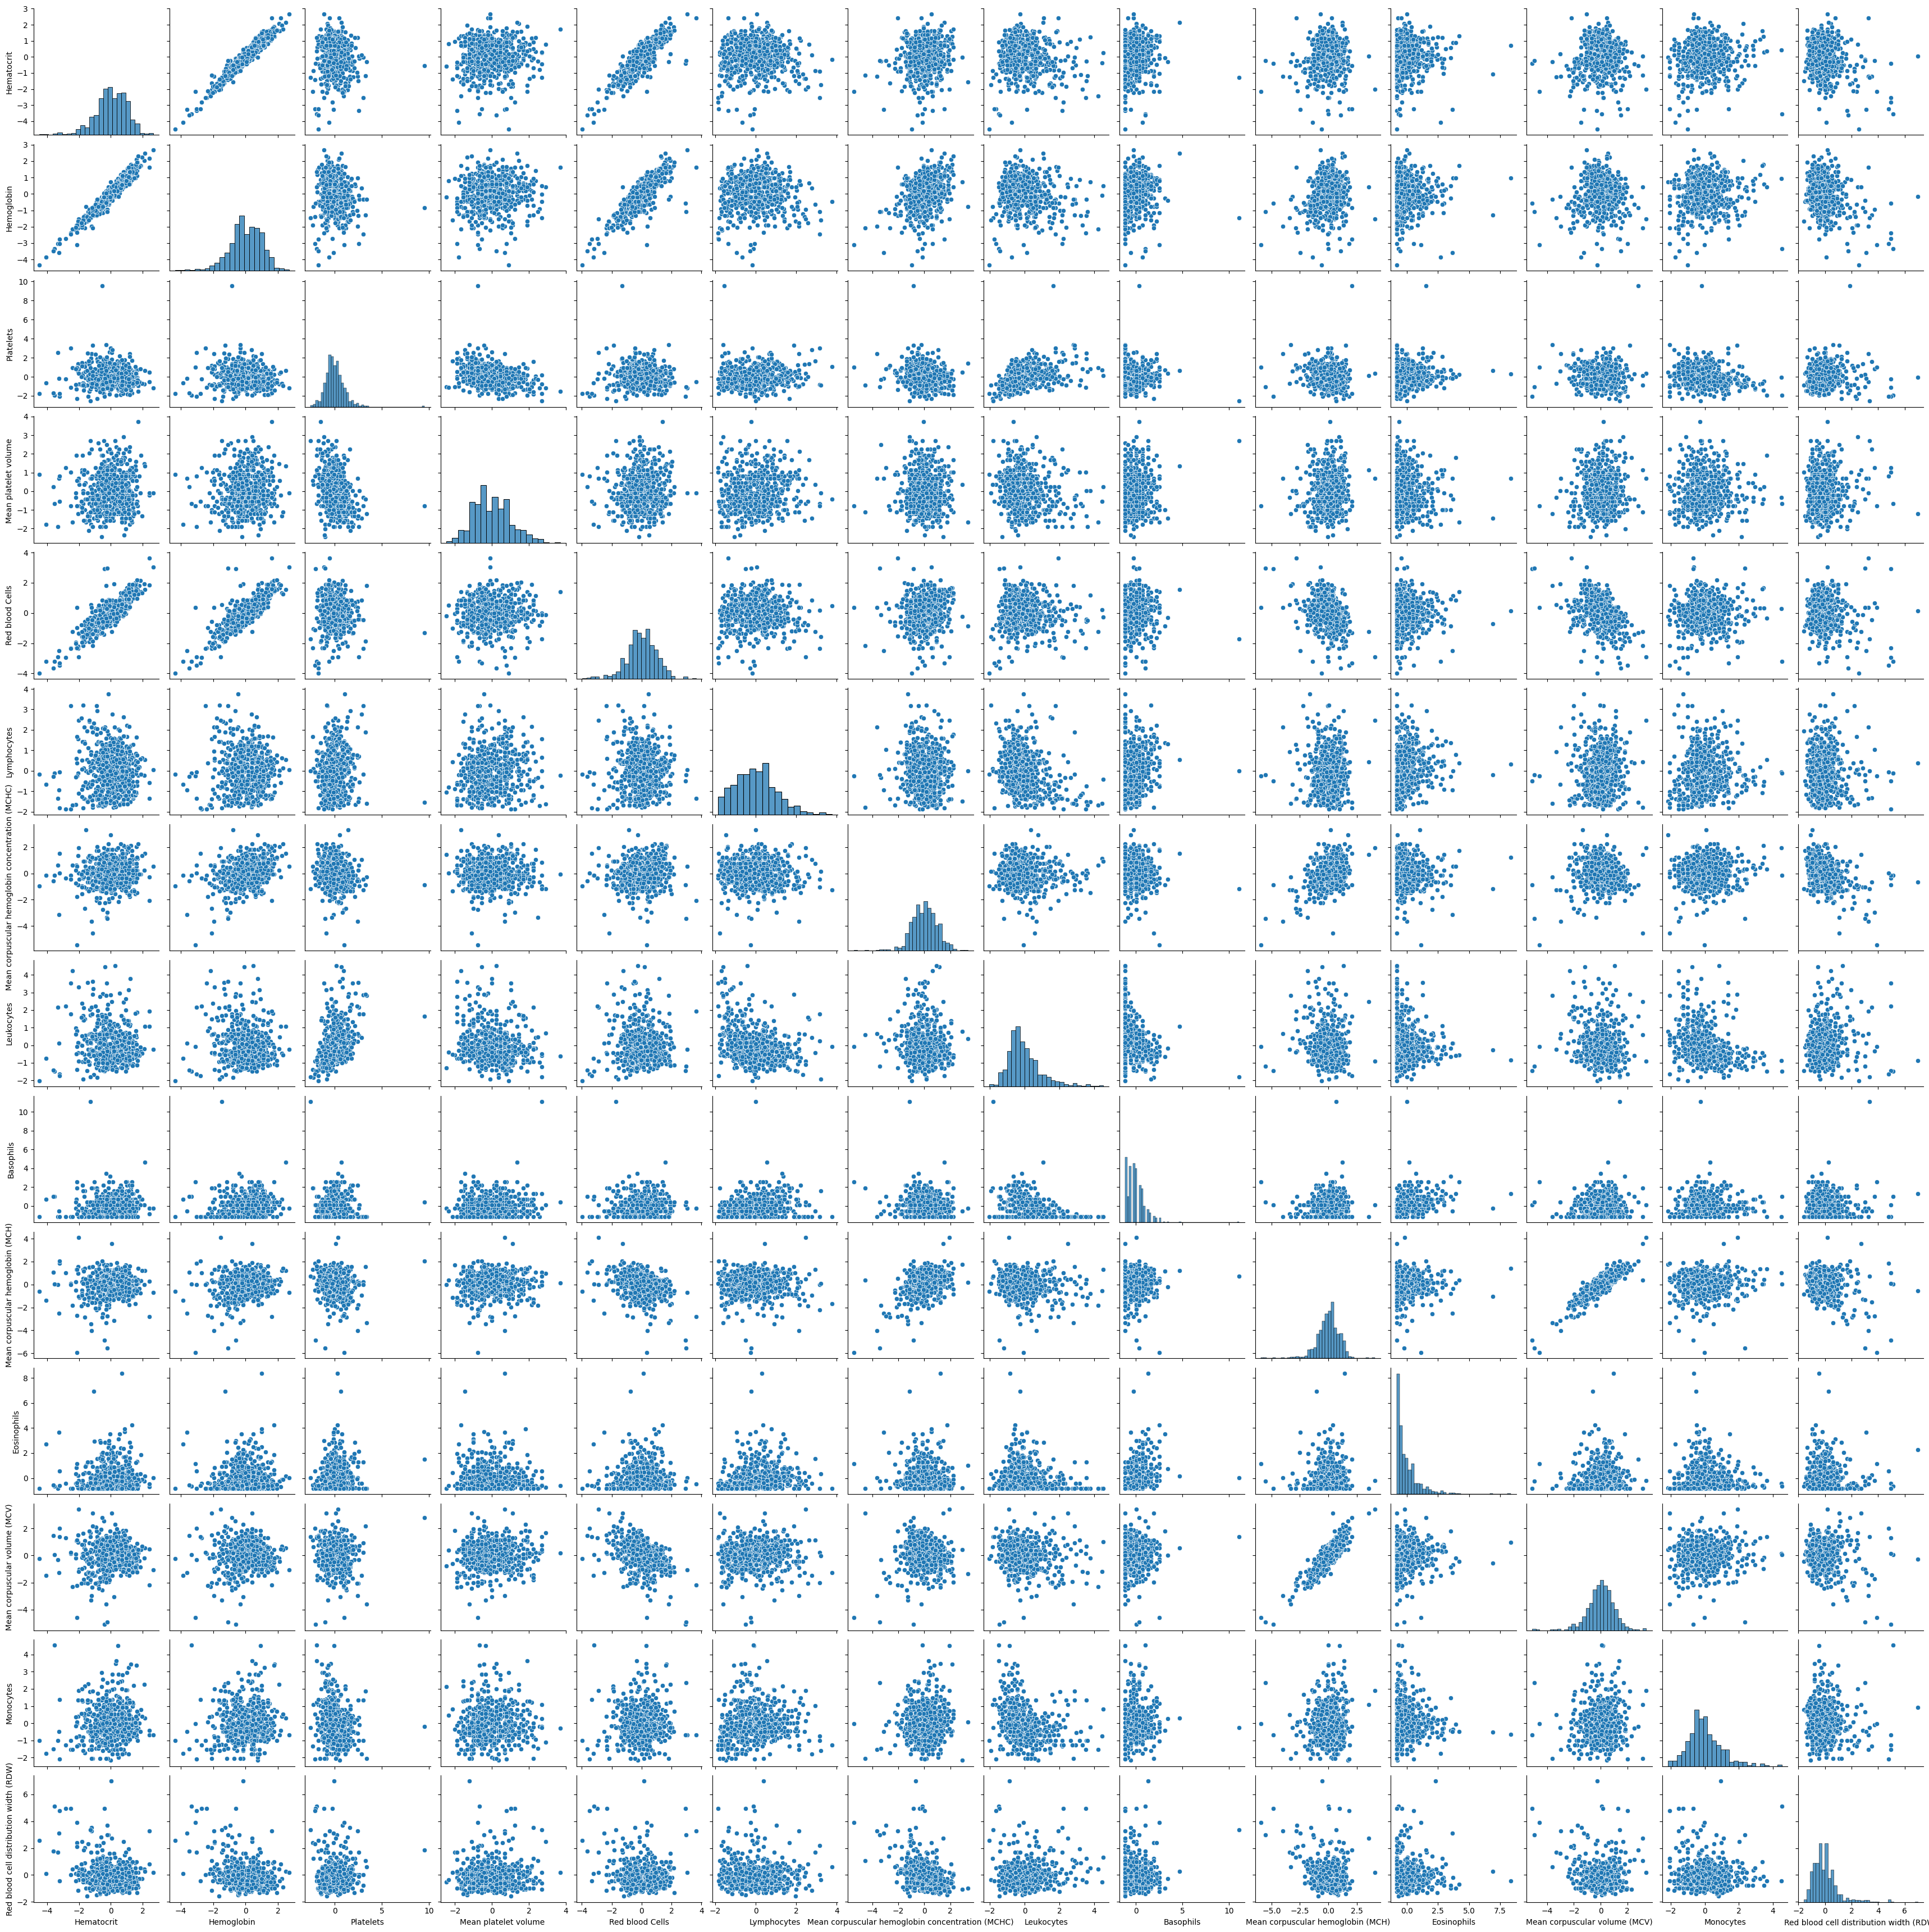

In [208]:
sns.pairplot(df_covid[bloodtest_features])
plt.show()
plt.close()

On remarque qu'il ya deja beaucoup de colonnes. Il est assez comppliqué d'interpreter ces resultats. Mais la question suivante va nous permettre ne mieux voir et interpreter.

2. Calculer la matrice de corrélations entre les variables taux sanguins. Rappelons que plus la corrélation est proche de 1 (respectivement −1), plus les deux variables évoluent positivement (respectivement négativement) les unes avec les autres, c’est à dire quand l’une augmente l’autre augemnte aussi (respectivement quand l’une augmente l’autre diminue).

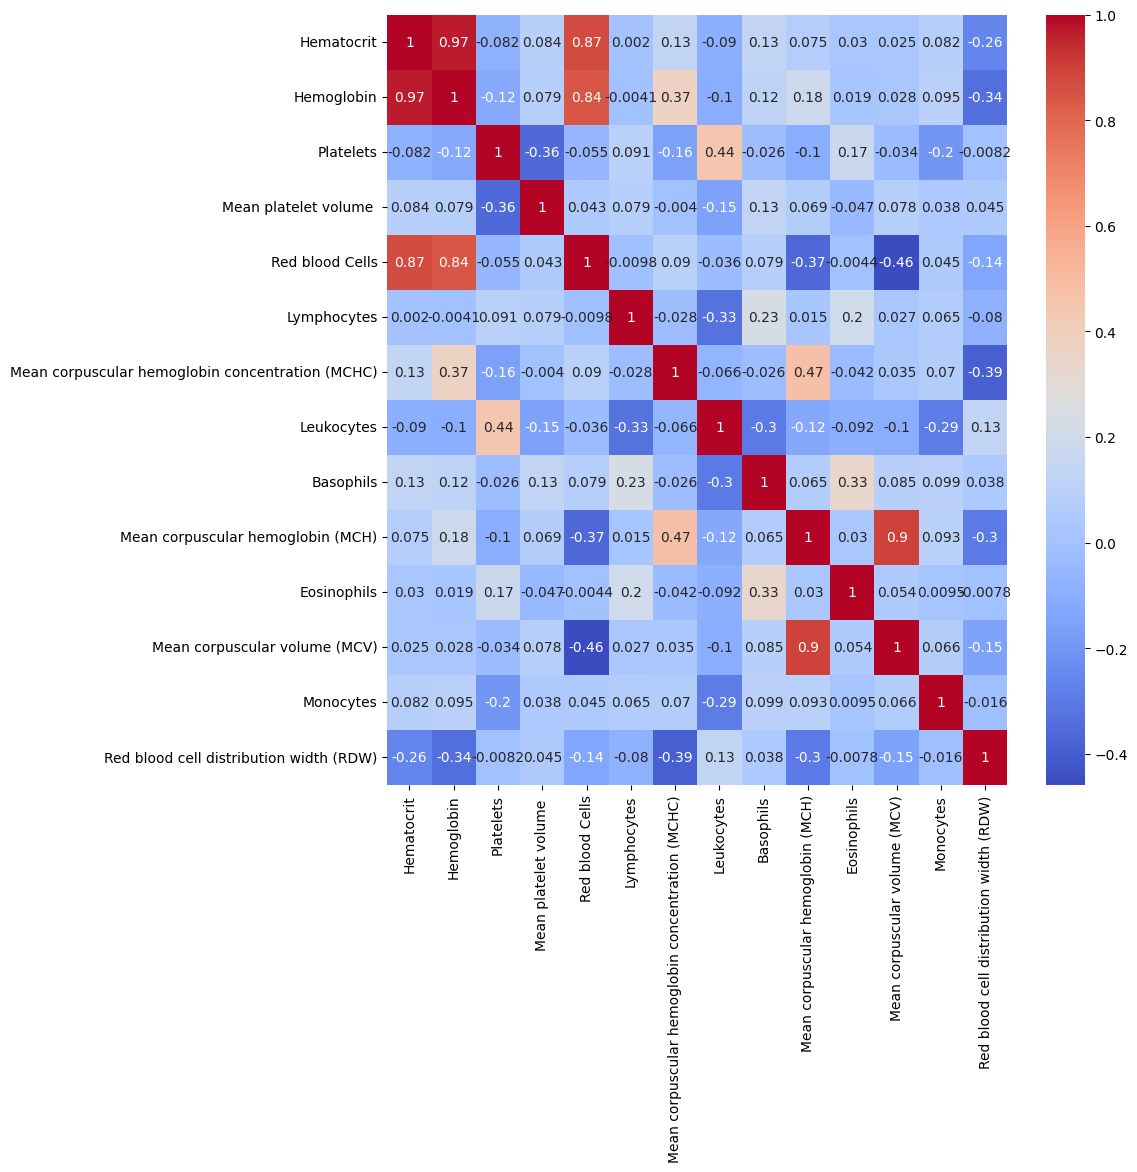

In [209]:
corr = df_covid[bloodtest_features].corr()
corr

#Afficher la matrice de corrélation sous forme de heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()
plt.close()

3. Utiliser la méthode clustermap de Seaborn qui permet de rassembler directement les variables et les organise sous forme de cluster ayant des fortes corrélations linéaires.

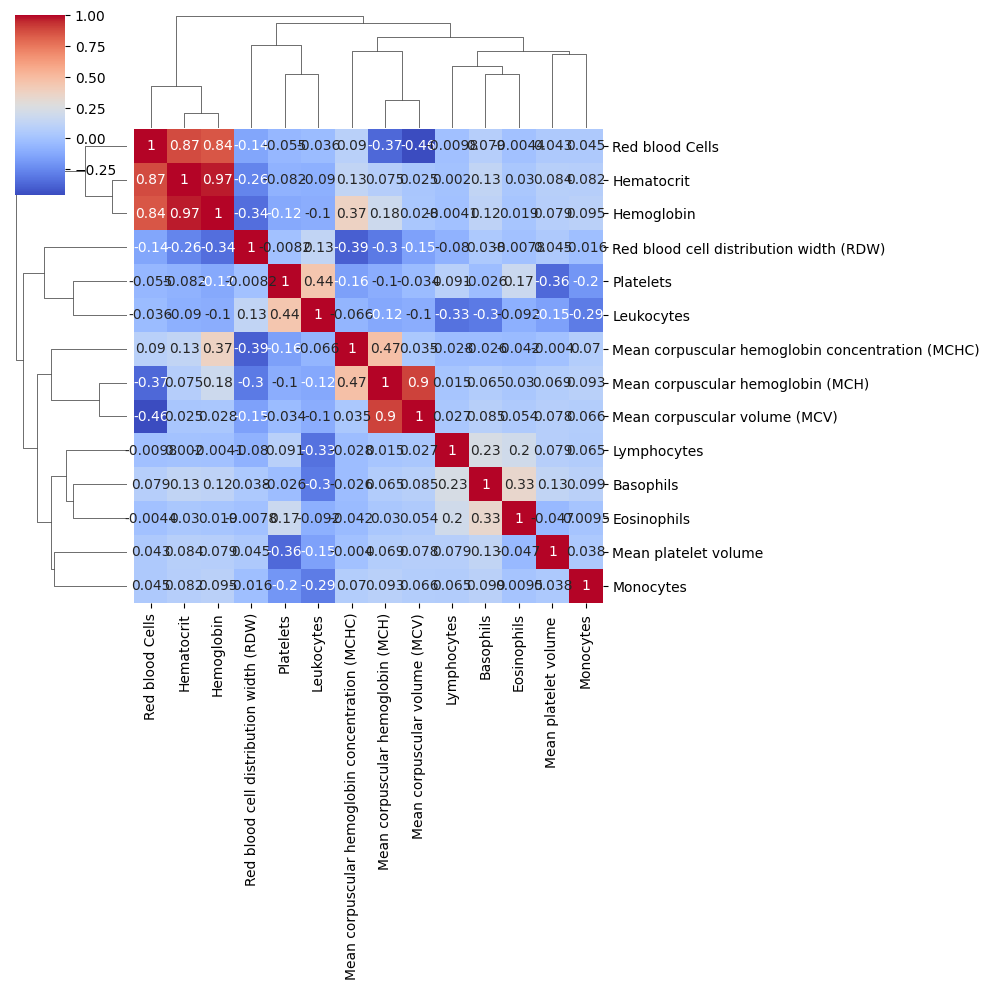

In [210]:
sns.clustermap(corr, annot=True, cmap='coolwarm')
plt.show()
plt.close()

Avec les methode cluster, on peut donc voir quelles sont les variables qui ont une forte correlation (+0.9) entre elles. Et cela va beaucoup nous servir dans la prise de decision.

4. Étudier s’il existe une relation linéaire entre la variable âge et les variables taux sanguins, utiliser la corrélation âge /taux sanguins.
df_covid.corr()['Patient age quantile'].sort_values(). Interpréter.

C:\Users\Mostafa\AppData\Local\Temp\ipykernel_19636\712998042.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


<Figure size 640x480 with 0 Axes>

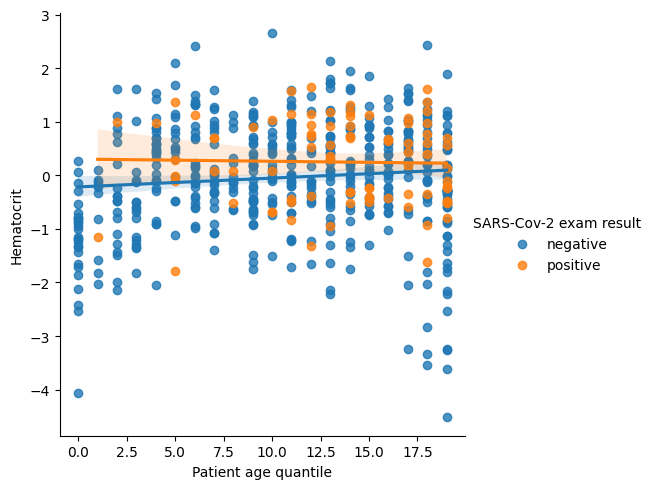

<Figure size 640x480 with 0 Axes>

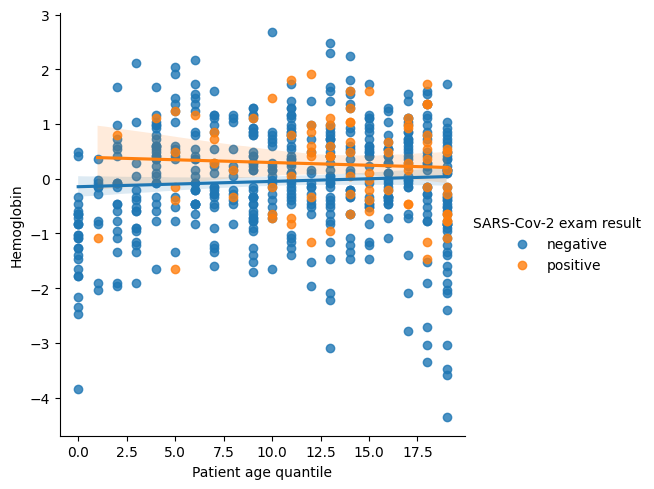

<Figure size 640x480 with 0 Axes>

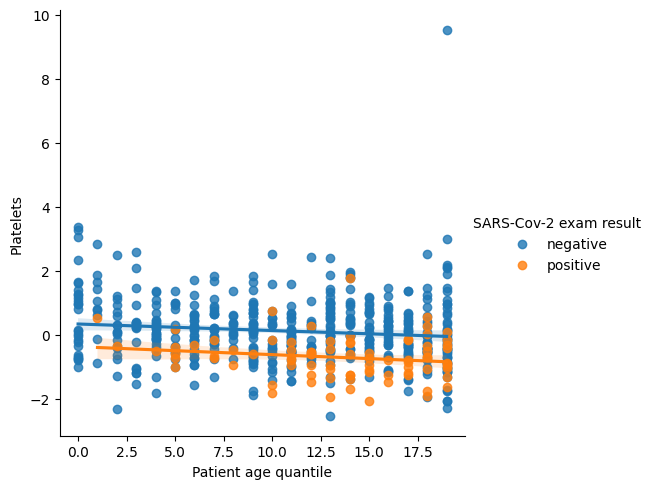

<Figure size 640x480 with 0 Axes>

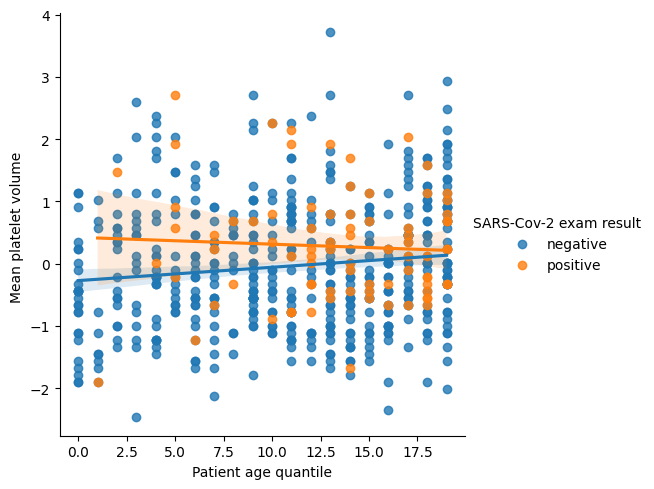

<Figure size 640x480 with 0 Axes>

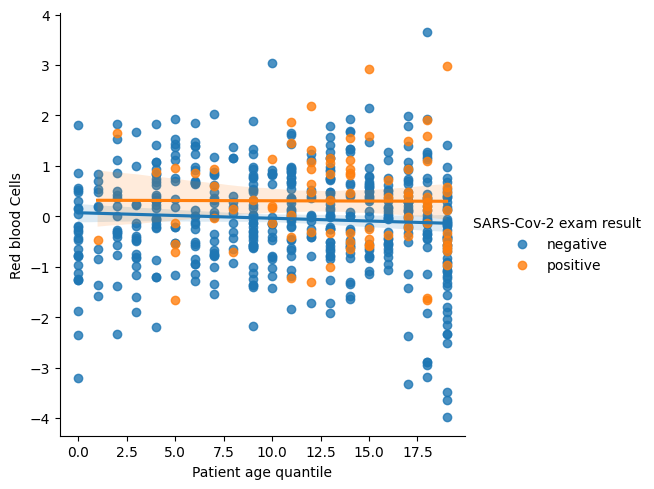

<Figure size 640x480 with 0 Axes>

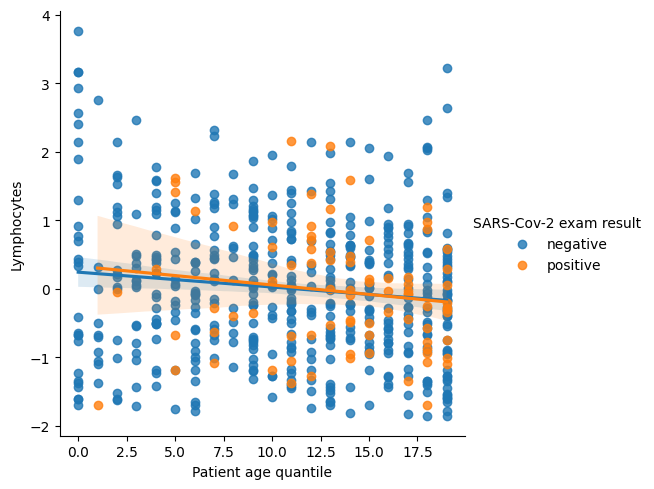

<Figure size 640x480 with 0 Axes>

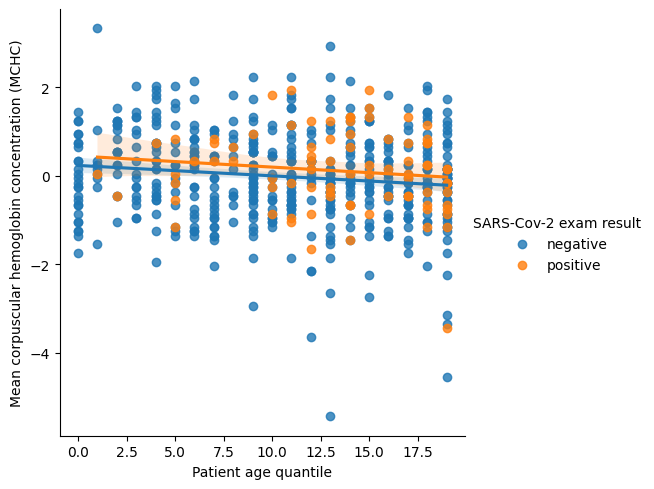

<Figure size 640x480 with 0 Axes>

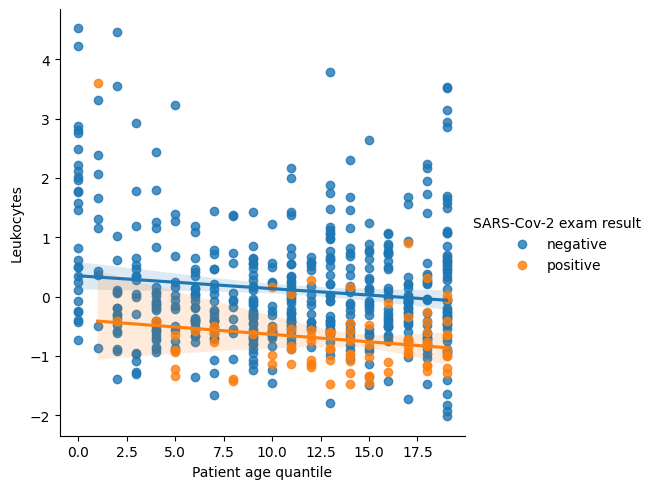

<Figure size 640x480 with 0 Axes>

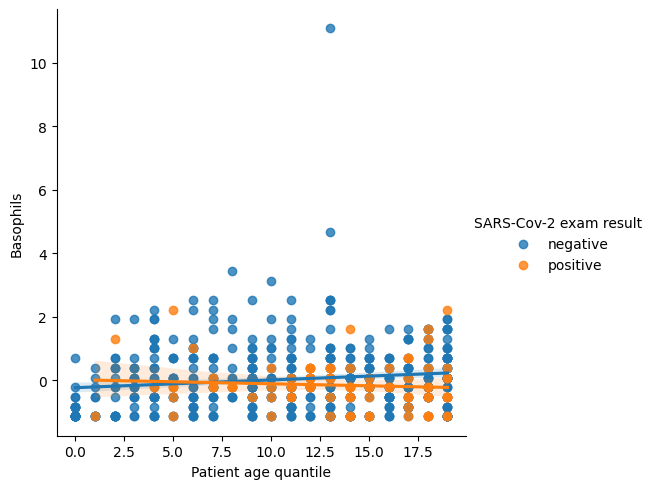

<Figure size 640x480 with 0 Axes>

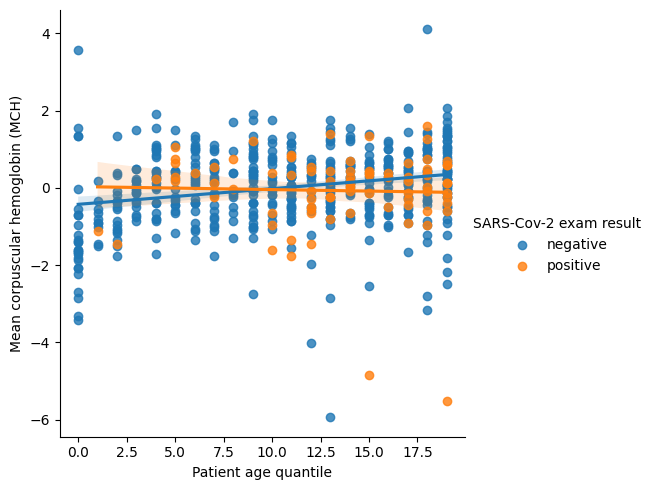

<Figure size 640x480 with 0 Axes>

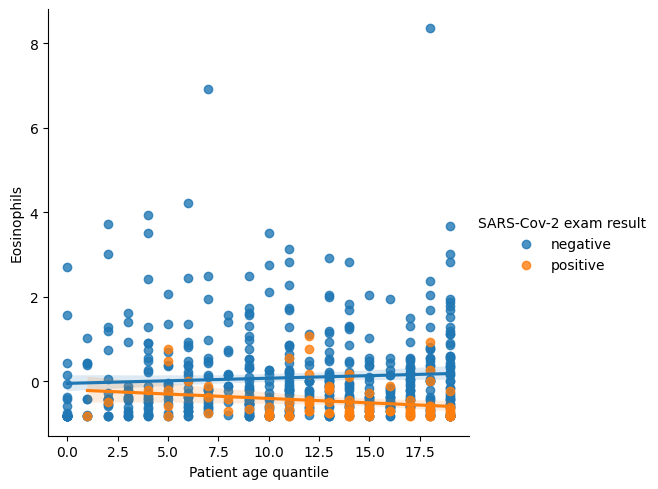

<Figure size 640x480 with 0 Axes>

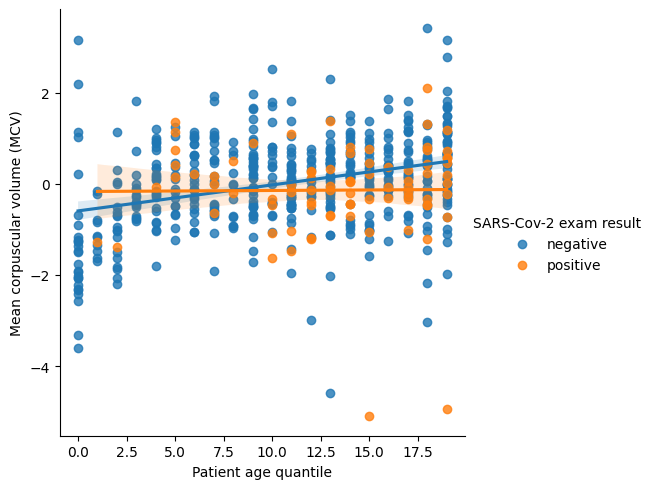

<Figure size 640x480 with 0 Axes>

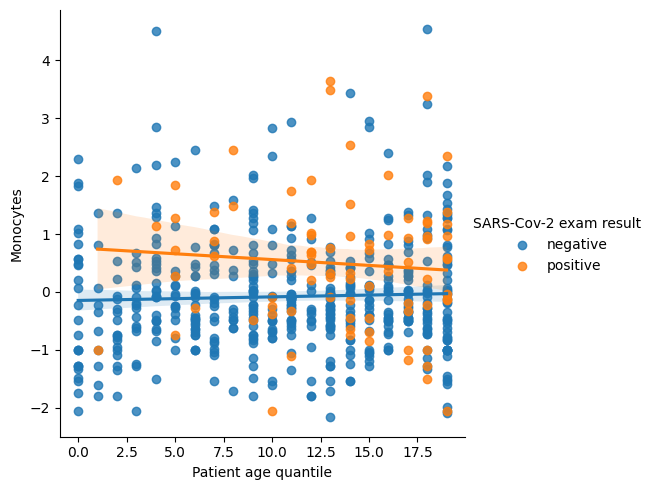

<Figure size 640x480 with 0 Axes>

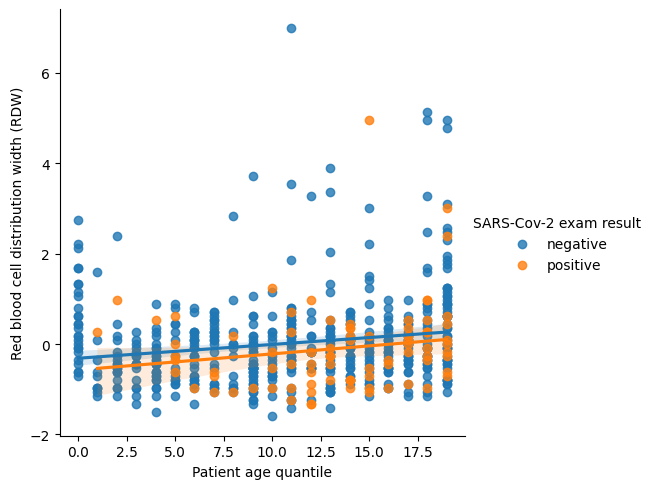

In [219]:
for col in bloodtest_features:
    plt.figure()
    sns.lmplot(x="Patient age quantile", y=col, hue="SARS-Cov-2 exam result", data=df_covid)


In [221]:
df_covid.corr()["Patient age quantile"].sort_values()

C:\Users\Mostafa\AppData\Local\Temp\ipykernel_19636\1873287096.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_covid.corr()["Patient age quantile"].sort_values()


Leukocytes                                              -0.166386
Platelets                                               -0.158683
Lymphocytes                                             -0.125935
Mean corpuscular hemoglobin concentration (MCHC)        -0.124671
Red blood Cells                                         -0.037510
Patient addmited to intensive care unit (1=yes, 0=no)   -0.035772
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.015736
Eosinophils                                              0.022085
Patient addmited to regular ward (1=yes, 0=no)           0.046166
Monocytes                                                0.050962
Hemoglobin                                               0.060320
Hematocrit                                               0.096808
Basophils                                                0.107525
Mean platelet volume                                     0.119449
Red blood cell distribution width (RDW)                  0.166429
Mean corpu

Nous pouvons observer que la variable d'âge présente une corrélation faible avec la plupart des variables de taux sanguin, avec des valeurs allant de -0,166386 à 0,281655. Cependant, la variable "Patient age quantile" présente une corrélation parfaite avec elle-même, car elle est utilisée pour définir l'âge du patient en groupes d'âge.

La corrélation âge /taux sanguins est faible pour la plupart des variables de taux sanguins, indiquant qu'il n'y a pas de forte relation linéaire entre l'âge et les taux sanguins. Cependant, il est important de noter que la corrélation ne mesure que la relation linéaire et ne prend pas en compte d'autres types de relations qui peuvent exister entre ces variables.

## 5.2 Relation: variables qualitatives / variables qualitatives

5. Supprimer les variables Influenza A, rapid test et Influenza B, rapid test car elles ont une très mauvaise sensibilité donc ces tests sont très peu fiables.

In [223]:
try:
    df_covid = df_covid.drop(['Influenza A, rapid test', 'Influenza B, rapid test'], axis=1)
except:
    print("Les colonnes 'Influenza A rapid test' et 'Influenza B rapid test' n'existent pas")
    pass

Les colonnes 'Influenza A rapid test' et 'Influenza B rapid test' n'existent pas


6. Tracer un graphique qui montrent de combien chaque patient est testé positif à une maladie.

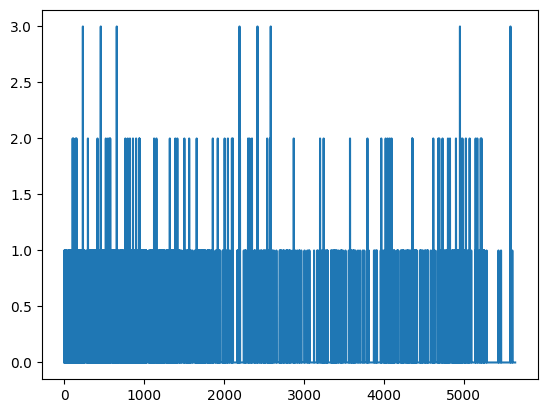

In [226]:
np.sum(df_covid[viraltest_features] == 'detected', axis=1).plot()
plt.show()

## 5.3 Relation: variables qualitatives / variables quantitatives

8. Nous allons créer une nouvelle variable etre_malade qui permet de vérifier si un patient est atteint d’au minimum 2 maladies:
df_covid['etre_malade'] = np.sum(df_covid[bloodtest_features] == 'detected', axis=1) > 1.

In [231]:
df_covid['etre_malade'] = np.sum(df_covid[viraltest_features] == 'detected', axis=1) >= 1
df_covid['etre_malade']

C:\Users\Mostafa\AppData\Local\Temp\ipykernel_19636\158816252.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_covid['etre_malade'] = np.sum(df_covid[viraltest_features] == 'detected', axis=1) >= 1


0       False
1        True
2       False
3       False
4        True
        ...  
5639    False
5640    False
5641    False
5642    False
5643    False
Name: etre_malade, Length: 5644, dtype: bool

9. Créer deux dataframes df_malade et df_non_malade pour deux groupes (patients malades et non malades)

In [232]:
df_malade = df_covid[df_covid['etre_malade'] == True]
df_non_malade = df_covid[df_covid['etre_malade'] == False]

10. Tracer les distributions des variables taux sanguins sachant que les patients soient malades ou non malades. 
    
Remarquer que: les taux des Lymphocytes, Leukocytes, MCH, MCV sont différents entre les personnes malades et non malades. Pour rendre ces constations robustes il va falloir  formuler des tests d’hypothèses pour comparer les moyennes des ces taux.

C:\Users\Mostafa\AppData\Local\Temp\ipykernel_19636\1521969556.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_malade[col], ax=ax, label='malade')
C:\Users\Mostafa\AppData\Local\Temp\ipykernel_19636\1521969556.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_non_malade[col], ax=ax, 

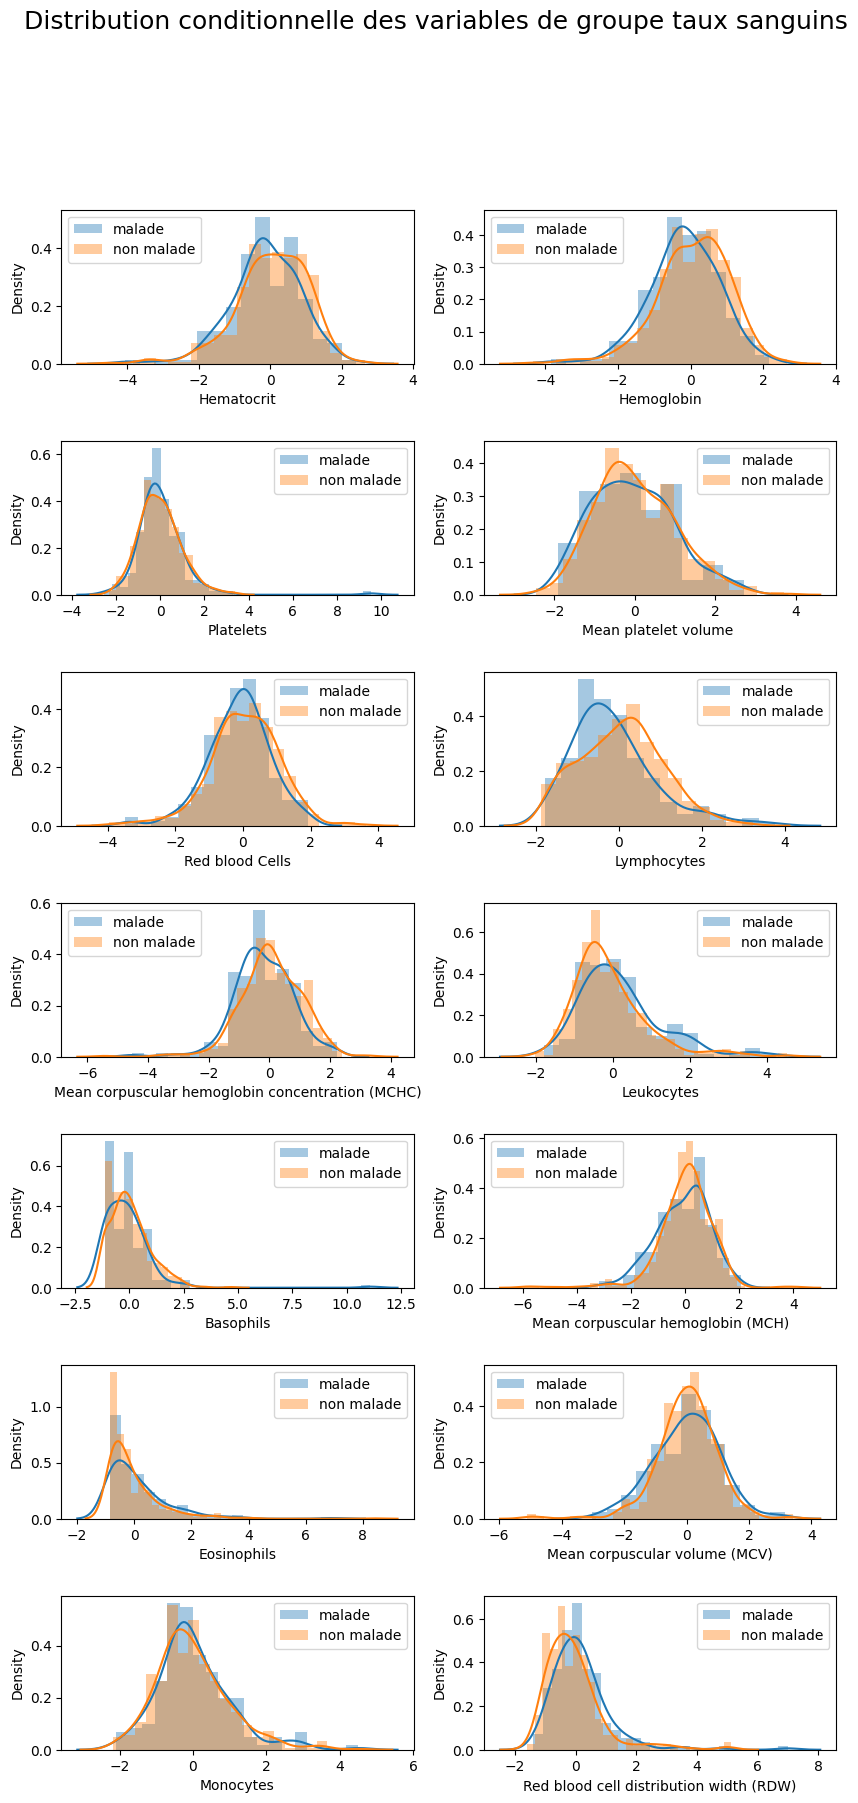

In [233]:
fig, axs = plt.subplots(nrows=7, ncols=2, figsize=(10, 20))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Distribution conditionnelle des variables de groupe taux sanguins", fontsize=18)

for col, ax in zip(bloodtest_features, axs.ravel()):
    sns.distplot(df_malade[col], ax=ax, label='malade')
    sns.distplot(df_non_malade[col], ax=ax, label='non malade')
    ax.legend()

plt.show()

11. Utiliser la fonction hospitalisaiton ci-dessous pour créer une nouvelle variable etre_hospitalise (pensez à utiliser la fonction map ou apply).

In [234]:
def hospitalisation(dataframe=df_covid):
    if dataframe['Patient addmited to regular ward (1=yes, 0=no)'] == 1:
        return 'surveillance'
    elif dataframe['Patient addmited to semi-intensive unit (1=yes, 0=no)'] == 1:
        return 'semi-intensive'
    elif dataframe['Patient addmited to intensive care unit (1=yes, 0=no)'] == 1:
        return 'soins intensifs'
    else:
        return 'autre'
    
    
df_covid['etre_hospitalise'] = df_covid.apply(hospitalisation, axis=1)

C:\Users\Mostafa\AppData\Local\Temp\ipykernel_19636\241410777.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_covid['etre_hospitalise'] = df_covid.apply(hospitalisation, axis=1)


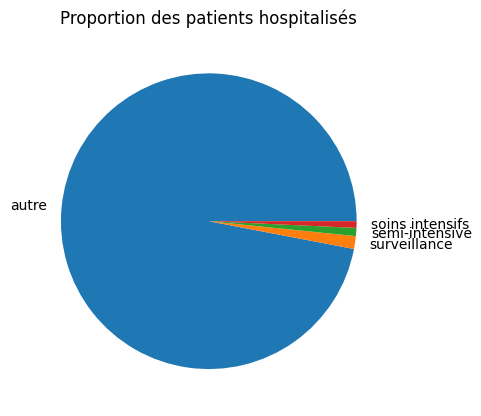

In [238]:
df_covid['etre_hospitalise'].value_counts()

df_covid['etre_hospitalise'].value_counts().plot.pie()
plt.title('Proportion des patients hospitalisés', rotation=0, ha='center', va='bottom')
plt.ylabel('')
plt.show()

12. Tracer la distribution conditionnelles des variables taux sanguins des patients sachant leurs états d’hospitalisation. Interpréter.

C:\Users\Mostafa\AppData\Local\Temp\ipykernel_19636\1537179318.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_covid[df_covid['etre_hospitalise'] == 'surveillance'][col], ax=ax, label='surveillance')
C:\Users\Mostafa\AppData\Local\Temp\ipykernel_19636\1537179318.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad63727

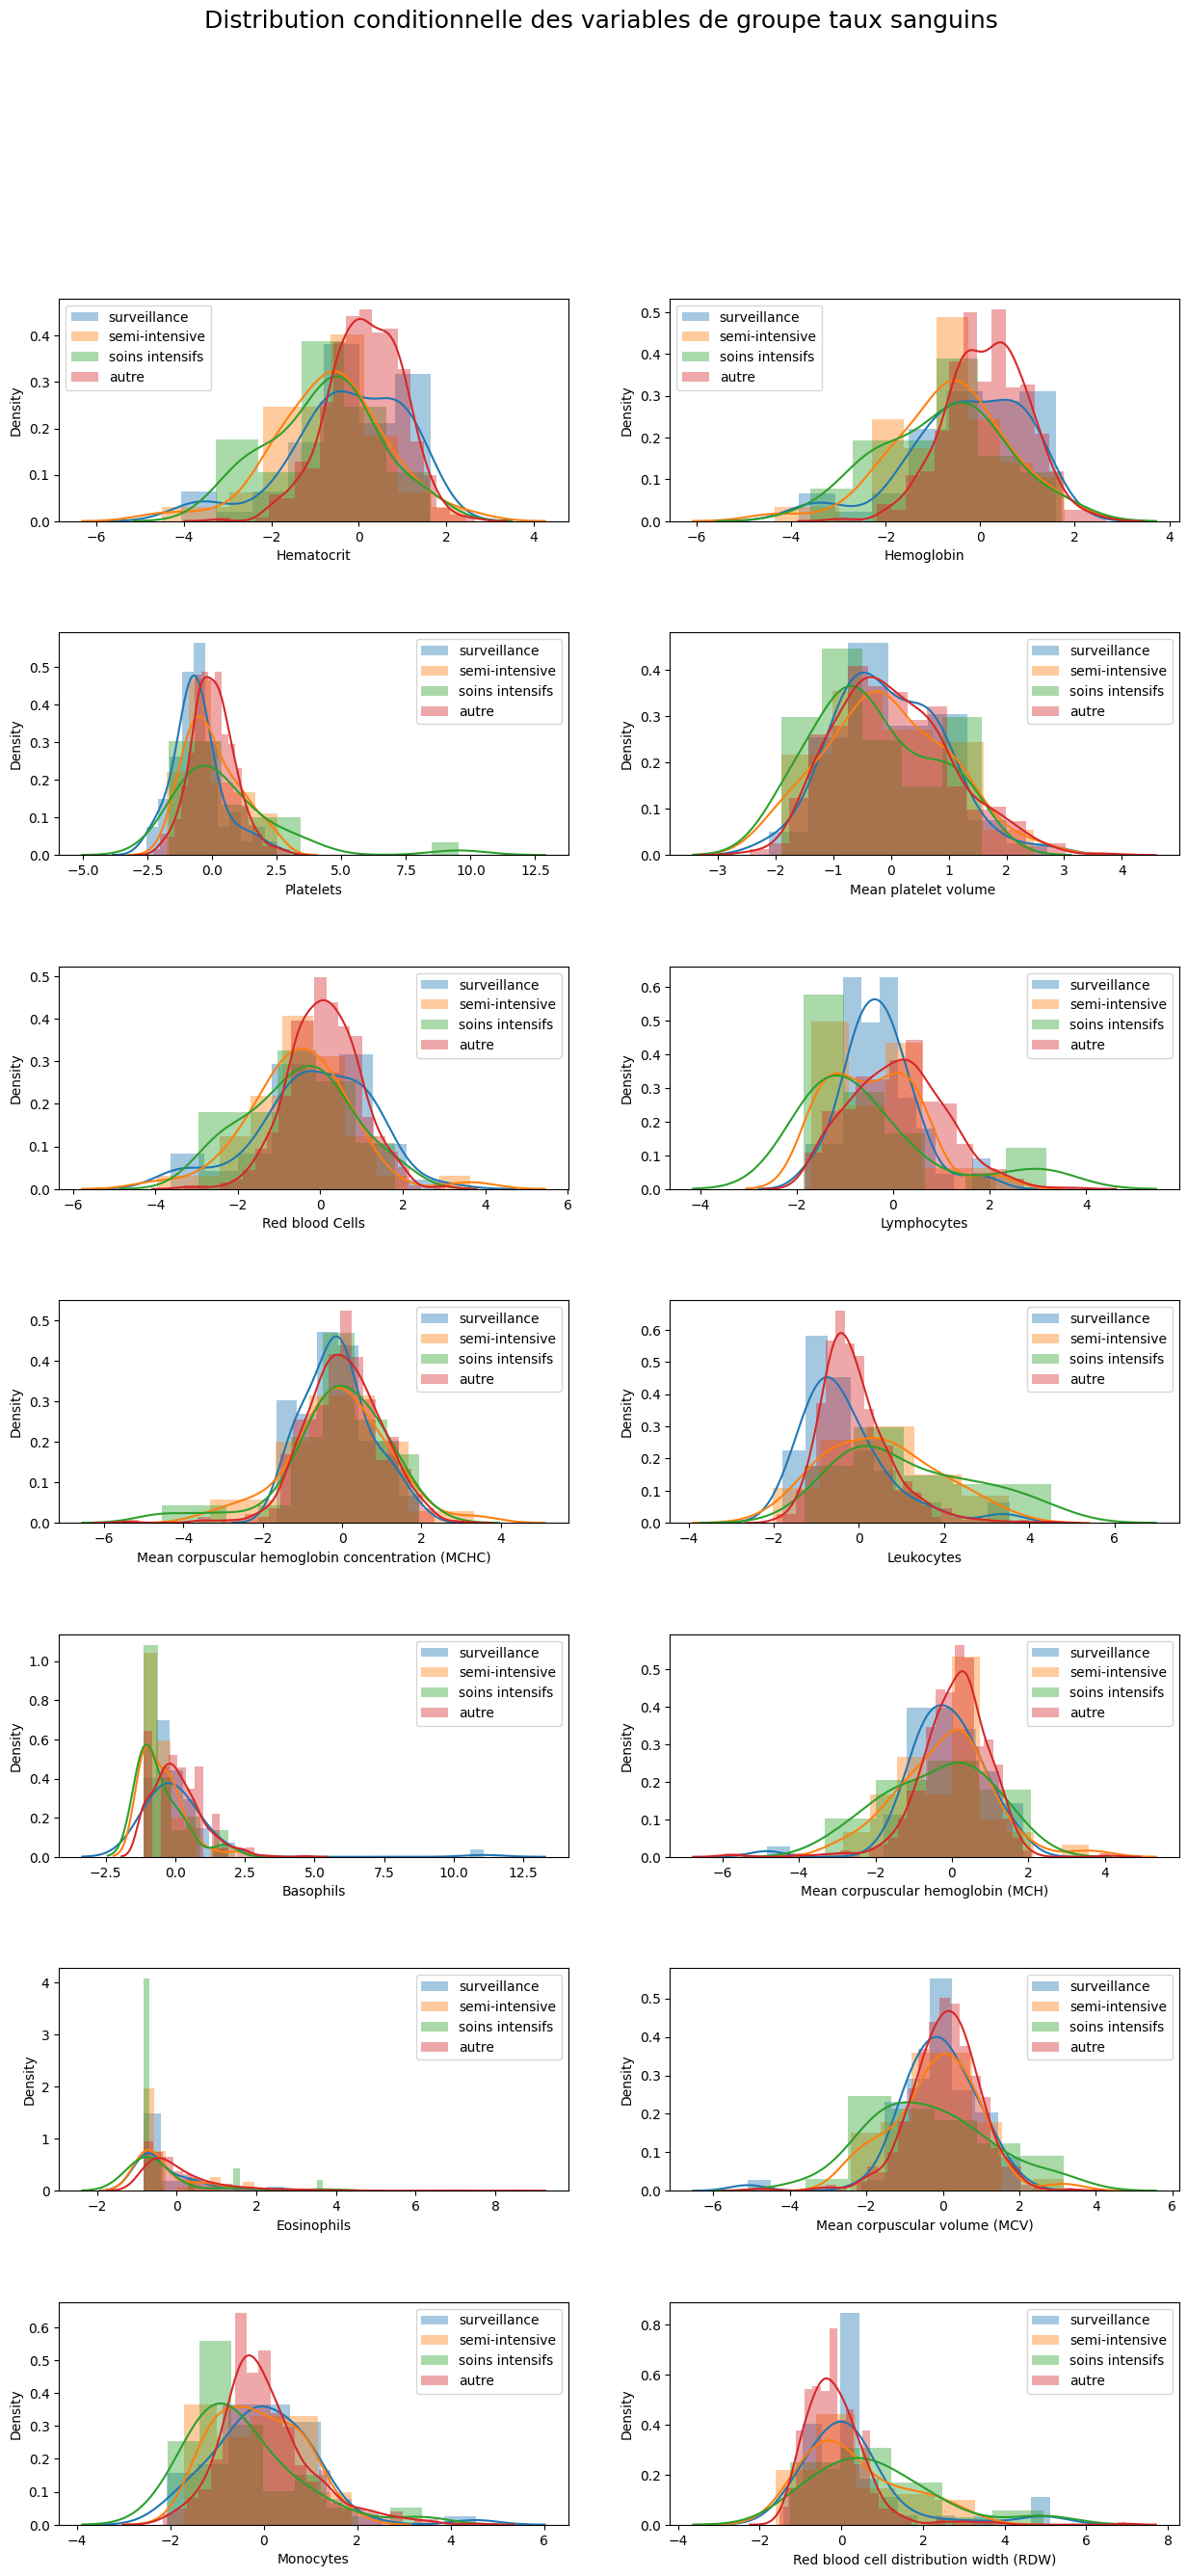

In [242]:
fig, axs = plt.subplots(nrows=7, ncols=2, figsize=(15, 30))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Distribution conditionnelle des variables de groupe taux sanguins", fontsize=18)

for col, ax in zip(bloodtest_features, axs.ravel()):
    sns.distplot(df_covid[df_covid['etre_hospitalise'] == 'surveillance'][col], ax=ax, label='surveillance')
    sns.distplot(df_covid[df_covid['etre_hospitalise'] == 'semi-intensive'][col], ax=ax, label='semi-intensive')
    sns.distplot(df_covid[df_covid['etre_hospitalise'] == 'soins intensifs'][col], ax=ax, label='soins intensifs')
    sns.distplot(df_covid[df_covid['etre_hospitalise'] == 'autre'][col], ax=ax, label='autre')
    ax.legend()


plt.show()



# 6. Validation des hypothèses

Hypothèse 1. Les patients testés positifs au covid-19 ont des taux de Leukocytes, Monocytes, Patletes
significativement différents par rapport aux patients testés négatifs.
Hypothèse 2. Les patients testés positifs d’une maladie quelconque ont des taux Lymphocytes, Leukocytes,
MCH, MCV significativement différents para rapport aux patients non malades.
1. Pour l’Hypothèse 1, on construit:
• (H0 ) : Les taux moyens sont égaux chez les patients testés positifs et négatifs.
• (H1 ) : Les taux moyens sont différents chez les patients testés positifs négatifs.
Pour tester cette hypothèse, nous allons utiliser un test de Student. Ce test permet de vérifier si
la moyenne entre deux distributions est significativement différente. Une condition pour pouvoir appliquer ce test est que les deux échantillons doivent avoir la même taille, en particulier dans notre cas: le nombre de patients testés positifs doit égal au nombre des patients testés négatifs. Cependant, cette condition n’est pas vérifié. Par conséquent, nous allons faire un sous-échantillonnage, c’est à dire on choisit aléatoirement un sous-échantillon de df_covid_pos de même taille que celui de l’échantillon df_covid_neg.


2. Avec la le module ttest_ind de Scipy tester la comparaison des moyennes de taux sanguins
chez les patients testés positifs et négatifs. 

On peut afficher les résultats du test:
for col in cols_taux_sanguins:
print(f'{col:-<70} {t_comparison(col)}')

In [ ]:
from scipy.stats import ttest_ind

n_samples_pos, _ = df_covid_pos.shape
n_samples_neg, _ = df_covid_neg.shape

df_covid_neg_samples = df_covid_neg.sample(n_samples_pos)
df_covid_neg_samples


def test_comparison(col):
    alpha = 0.05  # 5%
    stat, p = ttest_ind(df_covid_neg_samples[col].dropna(),
                        df_covid_pos[col].dropna())
    if p < alpha:
        return 'H0 Rejetée'
    else:
        return 0

for col in bloodtest_features:
    print(f"{col:-<50}: {test_comparison(col)}")


Les taux moyen ne sont pas égaux chez les individus positifs et négatifs ce qui fait que cette hypothese est rejetée.